# Анализ лояльности пользователей Яндекс Афиши с помощью Python
- Автор: Дьяченко Юлия
- Дата: 15.12.2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ лояльности пользователей Яндекс Афиши с целью формирования профиля пользователей, делающих повторные покупки для:
- оперативного выявления перспективных клиентов и формирования персонализированных предложений;
- настройки таргетированной рекламы для аудитории с высокой вероятностью возврата;
- оптимизировации маркетинговых бюджетов;
- повышения общего уровня удержания клиентов.


### Описание данных

***Выгрузка из базы данных содержит следующую информацию:***\
•	**user_id** — уникальный идентификатор пользователя, совершившего заказ;\
•	**device_type_canonical** — тип устройства, с которого был оформлен заказ ( mobile — мобильные устройства, desktop — стационарные);\
•	**order_id** — уникальный идентификатор заказа;\
•	**order_dt** — дата создания заказа (используйте данные created_dt_msk );\
•	**order_ts** — дата и время создания заказа (используйте данные created_ts_msk );\
•	**currency_code** — валюта оплаты;\
•	**revenue** — выручка от заказа;\
•	**tickets_count** — количество купленных билетов;\
•	**days_since_prev** — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;\
•	**event_id** — уникальный идентификатор мероприятия;\
•	**service_name** — название билетного оператора;\
•	**event_type_main** — основной тип мероприятия (театральная постановка, концерт и так далее);\
•	**region_name** — название региона, в котором прошло мероприятие;\
•	**city_name** — название города, в котором прошло мероприятие.

### Содержимое проекта
**[1. Загрузка и изучение данных](#1.-Загрузка-и-изучение-данных)**\
     [1.1. Загрузка данных](#1.1.-Загрузка-данных)\
     [1.2. Изучение данных](#1.2.-Изучение-данных)\
     [1.3. Промежуточный вывод](#1.3.-Промежуточный-вывод)
     
**[2. Предобработка данных](#2.-Предобработка-данных)**\
     [2.1. Приведение выручки к единой валюте российский рубль](#2.1.-Приведение-выручки-к-единой-валюте-российский-рубль)\
     [2.2. Наличие пропусков в данных](#2.2.-Наличие-пропусков-в-данных)\
     [2.3. Проверка на явные и неявные дубликаты в данных](#2.6.-Проверка-на-явные-и-неявные-дубликаты-в-данных)\
     [2.4. Преобразование типов данных](#2.3.-Преобразование-типов-данных)\
     [2.5. Нормализация данных в столбцах с номинальными данными](#2.4.-Нормализация-данных-в-столбцах-с-номинальными-данными)\
     [2.6. Проверка распределения ключевых численных данных, фильтрация выбросов](#2.5.-Проверка-распределения-ключевых-численных-данных,-фильтрация-выбросов)\
     [2.7. Промежуточный вывод после предобработки](#2.6.-Промежуточный-вывод-после-предобработки)
         
**[3. Создание профиля пользователя](#3.-Создание-профиля-пользователя)**\
     [3.1. Агрегация данных](#3.1.-Агрегация-данных)\
     [3.2. Оценка качества данных, получение статистических показателей](#3.2.-Оценка-качества-данных,-получение-статистических-показателей)\
     [3.3. Промежуточный вывод после создания профиля пользователя](#3.3.-Промежуточный-вывод-после-создания-профиля-пользователя)
         
**[4. Исследовательский анализ данных](#4.-Исследовательский-анализ-данных)**\
     [4.1. Признаки первого заказа и их связи с возвращением пользователя на платформу](#4.1.-Признаки-первого-заказа-и-их-связи-с-возвращением-пользователя-на-платформу)\
         [Задача 4.1.1. Изучение распределения пользователей по признакам](#Задача-4.1.1.-Изучение-распределения-пользователей-по-признакам)\
         [Задача 4.1.2. Анализ возвратов пользователей](#Задача-4.1.2.-Анализ-возвратов-пользователей)\
         [Задача 4.1.3. Проверка продуктовых гипотез](#Задача-4.1.3.-Проверка-продуктовых-гипотез)\
     [4.2. Анализ поведения пользователей через показатели выручки и состава заказа](#4.2.-Анализ-поведения-пользователей-через-показатели-выручки-и-состава-заказа)\
         [Задача 4.2.1. Анализ связи между средней выручкой сервиса с заказа и повторными заказами](#Задача-4.2.1.-Анализ-связи-между-средней-выручкой-сервиса-с-заказа-и-повторными-заказами)\
         [Задача 4.2.2. Сравнение распределения средней выручки с заказа у пользователей, совершивших 2–4 заказа / 5 и более заказов](#Задача-4.2.2.-Сравнение-распределения-средней-выручки-с-заказа-у-пользователей,-совершивших-2–4-заказа-/-5-и-более-заказов)\
         [Задача 4.2.3. Анализ влияния среднего количества билетов в заказе на вероятность повторной покупки](#Задача-4.2.3.-Анализ-влияния-среднего-количества-билетов-в-заказе-на-вероятность-повторной-покупки)\
     [4.3. Временные характеристики первого заказа и их влияние на повторные покупки](#4.3.-Временные-характеристики-первого-заказа-и-их-влияние-на-повторные-покупки)\
         [Задача 4.3.1. Анализ влияния дня недели, в который была совершена первая покупка на поведение пользователей](#Задача-4.3.1.-Анализ-влияния-дня-недели,-в-который-была-совершена-первая-покупка-на-поведение-пользователей)\
         [Задача 4.3.2. Анализ влияния среднего интервала между заказами на удержание клиентов](#Задача-4.3.2.-Анализ-влияния-среднего-интервала-между-заказами-на-удержание-клиентов)\
     [4.4. Корреляционный анализ количества покупок и признаков пользователя](#4.4.-Корреляционный-анализ-количества-покупок-и-признаков-пользователя)\
     
**[5. Итоговый вывод и рекомендации](#5.-Итоговый-вывод-и-рекомендации)**\
     [5.1. Информация о данных и их обработке](#5.1.-Информация-о-данных-и-их-обработке)\
     [5.2. Основные результаты анализа](#5.2.-Основные-результаты-анализа)\
     [5.3. Рекомендации для заказчика](#5.3.-Рекомендации-для-заказчика)

## Загрузка и изучение данных

### Загрузка данных

In [1]:
import sqlalchemy

In [2]:
import psycopg2

In [3]:
import os
from dotenv import load_dotenv

In [4]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix
from phik import resources
from phik.report import plot_correlation_matrix

In [7]:
# Чувствительные данные перенесены в .env
load_dotenv()

DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')

In [8]:
connection_string = (
    f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
)

In [9]:
engine = create_engine(connection_string)

In [10]:
query = '''
SELECT
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    (p.created_dt_msk::date -
        LAG(p.created_dt_msk::date) OVER (
            PARTITION BY p.user_id ORDER BY p.created_dt_msk
        )
    )::numeric AS days_since_prev,
    p.event_id,
    p.service_name,
    e.event_type_main,
    r.region_name,
    ct.city_name
FROM afisha.purchases AS p
JOIN afisha.events AS e
    ON p.event_id = e.event_id
LEFT JOIN afisha.city AS ct
    ON e.city_id = ct.city_id
LEFT JOIN afisha.regions AS r
    ON ct.region_id = r.region_id
WHERE p.device_type_canonical IN ('mobile','desktop')
  AND e.event_type_main != 'фильм'
ORDER BY p.user_id ASC
'''

In [11]:
df = pd.read_sql_query(query, con=engine)

### Изучение данных

In [12]:
df.shape

(290611, 14)

Данные содержат 290 611 строк и 14 столбцов.

In [13]:
#Корректность загрузки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

Все столбцы загружены корректно, типы данных изменений не требуют:
- даты корректно представлены в формате datetime64[ns],
- числовые поля (order_id, tickets_count, revenue, event_id) загружены корректно,
- категориальные поля — строковые (object).

In [14]:
#Проверка пропусков
df.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
service_name                 0
event_type_main              0
region_name                  0
city_name                    0
dtype: int64

Единственный столбец с пропусками — days_since_prev, что ожидаемо, т.к. для пользователей с первой покупкой разница в днях от предыдущей покупки отсутствует.

In [15]:
#Первичный осмотр данных
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк


Убеждаемся, что:
- даты и данные типа timestamps отображаются корректно,
- формат ID и названий сервисов читаемый,
- значения revenue содержат реальные суммы,
- распределение билетов выглядит логичным (обычно от 1 до 4),
- days_since_prev может быть и 0, и > 80 — это нормально.

In [16]:
df.describe(include='all')

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
count,290611,290611,2.906110e+05,290611,290611,290611,290611.000000,290611.000000,268678.000000,290611.000000,290611,290611,290611,290611
unique,21933,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,36,7,81,352
top,0beb8fc0c0a9ce1,mobile,NaN,NaN,NaN,rub,NaN,NaN,NaN,NaN,Билеты без проблем,концерты,Каменевский регион,Глиногорск
freq,10251,232490,NaN,NaN,NaN,285542,NaN,NaN,NaN,NaN,63519,115276,91058,89446
mean,NaN,NaN,4.326225e+06,2024-09-01 22:36:38.741272576,2024-09-02 13:31:19.397730816,NaN,625.584360,2.754311,3.222381,438019.834992,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,2024-06-01 00:00:00,2024-06-01 00:00:42,NaN,-90.760000,1.000000,0.000000,4436.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.163618e+06,2024-07-30 00:00:00,2024-07-30 11:53:37.500000,NaN,116.850000,2.000000,0.000000,361772.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.326366e+06,2024-09-12 00:00:00,2024-09-12 14:02:10,NaN,356.010000,3.000000,0.000000,498275.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.488330e+06,2024-10-09 00:00:00,2024-10-09 15:57:55.500000,NaN,810.130000,4.000000,1.000000,546287.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,8.653108e+06,2024-10-31 00:00:00,2024-10-31 23:59:54,NaN,81174.540000,57.000000,148.000000,592325.000000,NaN,NaN,NaN,NaN


Выявленные особенности:
- revenue имеет отрицательные значения (минимум: −90.76), возможная причина - возврат или коррекция,
- максимум revenue около 81 174 руб., в связи с чем требуется дальнейшая проверка выбросов на этапе предобработки,
- tickets_count достигает 57, что возможно при групповых заказах,
- максимум days_since_prev 148 дней, что соответствует пределу рассматриваемого временного интервала,
- device_type_canonical имеет только 2 значения, что соответствует бизнес-требованию (mobile (232 490 заказов), desktop (58 121 заказов)).

### Промежуточный вывод

В данные успешно загружено **290 611** записей о заказах пользователей сервиса «Яндекс Афиша».

Структура таблицы соответствует ожидаемой: в датасете **14 столбцов**, включающих даты, суммы заказов, количество билетов, идентификаторы пользователей и мероприятий, а также информацию о регионе и типе устройства.

**Типы данных определены корректно**:
- даты и временные метки представлены в формате datetime64[ns],
- числовые показатели — в int и float,
- категориальные признаки — object.

**Пропуски** присутствуют только в столбце **days_since_prev** (21 933 строк), что является нормальным, поскольку данный показатель не рассчитывается для пользователей с первой покупкой.

В данных **обнаружены отрицательные значения выручки** (вероятно, возвраты), а также **крупные суммы заказов и высокие значения количества билетов** (вероятно групповые заказы)— эти особенности потребуют дополнительной проверки на этапе предобработки и анализа выбросов.

***В целом выгрузка корректна, данные обладают достаточным объёмом и качеством для дальнейшего анализа поведения пользователей и формирования профилей.***

## Предобработка данных

### Приведение выручки к единой валюте российский рубль

In [17]:
ftt = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [18]:
ftt.info()
ftt.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
count,357,357.0,357.000000,357
unique,357,NaN,NaN,1
top,2024-01-10,NaN,NaN,kzt
freq,1,NaN,NaN,357
mean,NaN,100.0,19.755818,NaN
std,NaN,0.0,0.833798,NaN
min,NaN,100.0,17.848600,NaN
25%,NaN,100.0,19.120200,NaN
50%,NaN,100.0,19.876000,NaN
75%,NaN,100.0,20.443300,NaN


In [19]:
ftt.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [20]:
#Переведем дату в формат datetime64[ns] 
ftt['data'] = pd.to_datetime(ftt['data'])
ftt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [21]:
# Слияние датафреймов
df = pd.merge(df, ftt[['data', 'curs']], 
              left_on='order_dt', 
              right_on='data', 
              how='left')

In [22]:
#Проверяем корректность слияния
df.shape

(290611, 16)

Слияние прошло корректно

In [23]:
print("Пропуски в поле курса валюты после объединения:")
df['curs'].isna().sum()

Пропуски в поле курса валюты после объединения:


np.int64(0)

In [24]:
#Создадим столбец со стоимостью в рублях:
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100) 

In [25]:
# Удаляем лишние столбцы
df = df.drop(columns=['data','curs'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк,1390.41


### Наличие пропусков в данных

In [26]:
df.isna().sum().sort_values()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
event_id                     0
service_name                 0
event_type_main              0
region_name                  0
city_name                    0
revenue_rub                  0
days_since_prev          21933
dtype: int64

Выгрузка данных прошла успешно

### Проверка на явные и неявные дубликаты в данных

In [27]:
# Проверим наличие явных дубликатов
print("Дубликатов по полному датафрейму:", df.duplicated().sum())

Дубликатов по полному датафрейму: 0


**В датафрейме нет полных дубликатов строк.**

***Проверим неявные дубликаты — значения по id заказов:***

In [28]:
#проверим уникальность значений в поле order_id
print("\nВ датасете df по полю order_id уникальных значений:", df['order_id'].nunique(), "из всего значений:", df.shape[0])


В датасете df по полю order_id уникальных значений: 290611 из всего значений: 290611


**Все значения в поле order_id уникальны.**

### Преобразование типов данных

Все данные имеют корректный тип.\
Попробуем понизить размерность для следующих полей\
int: **order_id, tickets_count, event_id**;\
float: **revenue, days_since_prev, revenue_rub**\
(необязательно и не критично).

In [29]:
pd.to_numeric(df['order_id'], downcast='integer')
pd.to_numeric(df['tickets_count'], downcast='integer')
pd.to_numeric(df['event_id'], downcast='integer')

pd.to_numeric(df['revenue'], downcast='float')
pd.to_numeric(df['days_since_prev'], downcast='float')
pd.to_numeric(df['revenue_rub'], downcast='float')

0         1521.94
1          289.45
2         1258.57
3            8.49
4         1390.41
           ...   
290606    1448.36
290607     965.57
290608     178.95
290609     661.53
290610     802.25
Name: revenue_rub, Length: 290611, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

При автоматизированном понижении размерность не понизилась, следовательно понижать её вручную нецелесообразно.

### Нормализация данных в столбцах с номинальными данными

Для номинальных данных поменяем тип на category и проверим на наличие нетипичных значений

In [31]:
categorical_cols = [
    'device_type_canonical', 'currency_code',
    'service_name', 'event_type_main',
    'region_name', 'city_name'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  category      
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  category      
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  category      
 11  event_type_main        290611 non-null  category      
 12  region_name            290611 non-null  cate

In [32]:
for col in categorical_cols:
    print(f"\nЗначения в {col}:")
    print(df[col].value_counts().head())


Значения в device_type_canonical:
device_type_canonical
mobile     232490
desktop     58121
Name: count, dtype: int64

Значения в currency_code:
currency_code
rub    285542
kzt      5069
Name: count, dtype: int64

Значения в service_name:
service_name
Билеты без проблем    63519
Лови билет!           41124
Билеты в руки         40343
Мой билет             34839
Облачко               26642
Name: count, dtype: int64

Значения в event_type_main:
event_type_main
концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
Name: count, dtype: int64

Значения в region_name:
region_name
Каменевский регион      91058
Североярская область    44049
Широковская область     16457
Медовская область       13901
Озернинский край        10476
Name: count, dtype: int64

Значения в city_name:
city_name
Глиногорск      89446
Озёрск          43910
Радужсвет       13711
Радужнополье     8741
Верховино        6579
Name: count, dtype: int64


Нетипичных значений нет, нормализация данных не требуется.

### Проверка распределения ключевых численных данных, фильтрация выбросов

Проверим ключевые показатели с численными данными: **revenue_rub, tickets_count**

In [33]:
df[['revenue_rub', 'tickets_count']].describe()

,revenue_rub,tickets_count
count,290611.000000,290611.000000
mean,555.571987,2.754311
std,875.498172,1.170620
min,-90.760000,1.000000
25%,113.970000,2.000000
50%,351.140000,3.000000
75%,802.050000,4.000000
max,81174.540000,57.000000


Проанализируем выбросы по полю **tickets_count**

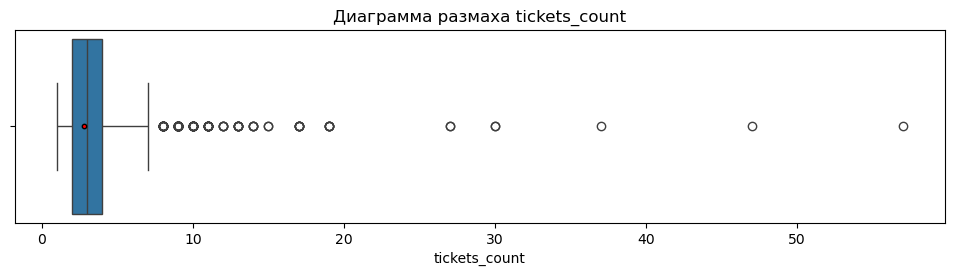

In [34]:
plt.figure(figsize=(12,2.5))
sns.boxplot(x=df['tickets_count'])

#среднее:
mean = df['tickets_count'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=10, zorder=5)
    
plt.title('Диаграмма размаха tickets_count')
plt.show()

In [35]:
# Создадим функцию для расчета границ выбросов
def limits(value):
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1
    oah = 1.5 * IQR
    lower_border = round(Q1 - oah, 2)
    upper_border = round(Q3 + oah, 2)
    print(f'Значения ниже {lower_border} или выше {upper_border} являются выбросами')

In [36]:
# Применим функцию для расчета границ выбросов
limits(df['tickets_count'])

Значения ниже -1.0 или выше 7.0 являются выбросами


***Оценка распределения данных по полю tickets_count***

Распределение имеет положительную ассиметрию.\
Значения среднего арифметического и медианы близки.\
Около 50% данных находятся в диапазоне между 2 и 4.\
Основной разброс данных находится в интервале от 1 до 7, значения выше 7 являются выбросами.\
Отдельные выбросы по полю tickets_count скорее всего являются результатами групповых заказов.

Проанализируем выбросы по полю **revenue_rub**

In [37]:
# Создаем пользовательскую функцию для гистограммы и графика размаха с отметкой среднего на последнем
def plot_box_hist(
    data: pd.Series,
    bins,
    title: str,
    figsize=(12, 6)
):
# Вычисляем среднее значение для отметки на графике размаха
    mean_value = data.mean()
# Создаём область с двумя осями: графика размаха сверху, гистограмма снизу
    fig, (ax_box, ax_hist) = plt.subplots(
        2,
        sharex=True,
        figsize=figsize,
        gridspec_kw={'height_ratios': (0.2, 0.8)}
    )

    # График размаха
    sns.boxplot(
        x=data,
        ax=ax_box
    )

    # Среднее значение (красная точка)
    ax_box.scatter(
        mean_value,
        0,
        color='red',
        edgecolor='black',
        s=40,
        zorder=5
    )

    ax_box.set_title(title)
    ax_box.set(xlabel='')

    # Гистограмма
    sns.histplot(
        data,
        bins=bins,
        edgecolor='black',
        ax=ax_hist
    )

    # Убираем сетку
    ax_box.grid(False)
    ax_hist.grid(False)

    plt.show()

In [38]:
# Вычисляем 99-й перцентиль
max_val = df['revenue_rub'].quantile(0.99)

# Отфильтовываем 99-й перцентиль
f_df = df[df['revenue_rub'] <= max_val]

# Фиксируем интервалы гистограммы
bins = np.linspace(
    f_df['revenue_rub'].min(),
    f_df['revenue_rub'].max(),
    100
)

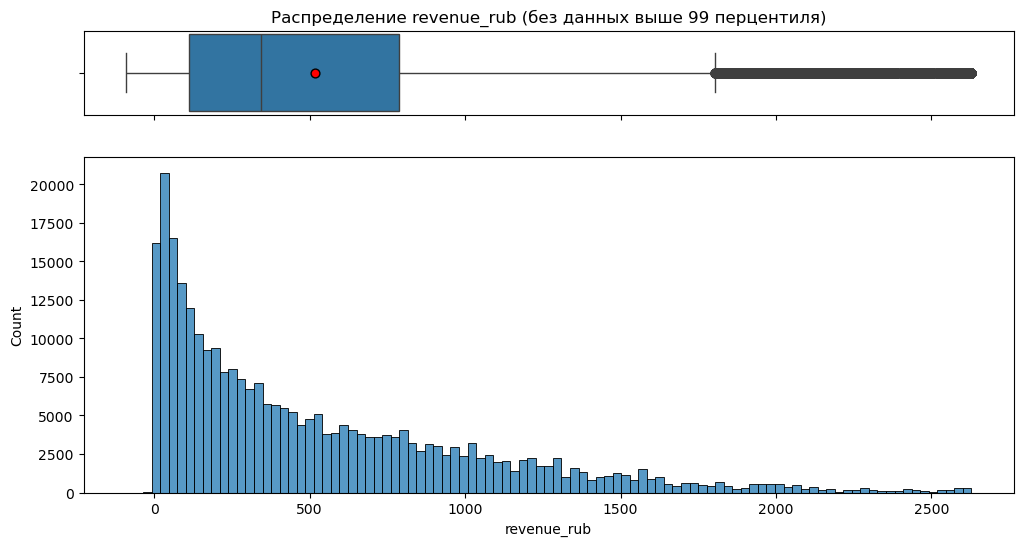

In [39]:
# Вызываем функцию
plot_box_hist(
    data=f_df['revenue_rub'],
    bins=bins,
    title='Распределение revenue_rub (без данных выше 99 перцентиля)'
)

In [40]:
# Применим функцию для расчета границ выбросов
limits(df['revenue_rub'])

Значения ниже -918.15 или выше 1834.17 являются выбросами


In [41]:
df['revenue_rub'].describe()

count    290611.000000
mean        555.571987
std         875.498172
min         -90.760000
25%         113.970000
50%         351.140000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64

***Оценка распределения данных по полю revenue_rub***

Распределение имеет положительную ассиметрию.\
Значения среднего арифметического и медианы не близки.\
Около 50% данных находятся в диапазоне прибилзительно от 112 до 789.\
Основной разброс данных находится в интервале от -91 до 1834, значения от 1834 до 2628 являются выбросами.\
Положительные выбросы по полю revenue_rub скорее всего являются результатами групповых заказов, а отрицательные - возвратов.

Для дальнейших расчетов отфильтруем выбросы по полю **revenue_rub** выше 99 процентиля.

In [42]:
#Выведем значение 99 перцентиля
print(f"Значение 99 перцентиля: {round(max_val, 2)}.")
#Посчитаем, сколько данных оказалось выше 99 перцентиля и было удалено из расчета, их долю:
removed = df.shape[0] - f_df.shape[0]
removed_part = round(removed / df.shape[0] * 100, 2)

print(f"Исходный объём данных: {df.shape[0]}.")
print(f"Объём данных после фильтрации: {f_df.shape[0]}.")
print(f"Удалено данных: {removed}.")
print(f"Удалено данных: {removed_part}%.")

df=f_df.copy()

Значение 99 перцентиля: 2628.42.
Исходный объём данных: 290611.
Объём данных после фильтрации: 287786.
Удалено данных: 2825.
Удалено данных: 0.97%.


### Промежуточный вывод после предобработки

На этапе предобработки данные были проверены на корректность типов и полноту.\
Типы данных в столбцах **order_dt** и **order_ts** уже находились в формате datetime64[ns], поэтому их **преобразование не потребовалось**.\
**Категориальные данные были приведены к типу category** для оптимизации объёма памяти.

Отсутствующие значения присутствуют только в столбце **days_since_prev** (около 22 тыс.), что является ожидаемым — для первой покупки пользователя разница в днях не определяется.

**Дубликатов** - явных и неявных **не обнаружено.**

Проверка **категориальных данных** показала, что в данных нет некорректных или технических категорий («unknown», «none», пустых строк), поэтому **нормализация не потребовалась**.

Было изучено распределению ключевых числовых показателей — **revenue_rub** и **tickets_count**.\
Распределения по обоим полям оказались правосторонним с выбросами, особенно выраженными по выручке.\
Отдельные выбросы по полю **tickets_count** скорее всего являются результатами групповых заказов.\
Минимальные значения по полю revenue_rub включают отрицательные суммы, вероятно отражающие возвраты.

В соответствии с требованиями задания **данные по выручке были очищены от данных, превышающих 99 перцентиль**.\
В результате фильтрации **было удалено 2825 записей (около 0.97%)**, что позволило исключить аномально большие значения, не влияя на общую структуру данных.

## Создание профиля пользователя

### Агрегация данных

In [43]:
  profile = (df
          # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
          .sort_values(by='order_ts')
          # Затем группируем по номеру пользователя и агрегируем данные:
          .groupby('user_id')
          .agg(
              # Находим первую и последнюю даты заказа:
              first_order_dt=('order_dt','min'),
              last_order_dt=('order_dt','max'),
              # Находим устройства, регион, название билетного партнера и тип мероприятия первого заказа:
              first_device=('device_type_canonical','first'),
              first_region=('region_name','first'),
              first_partner=('service_name','first'),
              first_genre=('event_type_main','first'),
              # Подсчитваем количество заказов:
              total_orders=('order_id','nunique'),
              # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
              avg_revenue=('revenue_rub','mean'),
              avg_tickets=('tickets_count','mean'),
              # Считаем среднее количество дней между покупками:
              avg_days_between=('days_since_prev','mean')
          )
          # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
          .assign(
              is_two = lambda x: x['total_orders'] >= 2,
              is_five = lambda x: x['total_orders'] >= 5
          )
         .reset_index()
  )
profile['is_two'] = profile['is_two'].astype(int)
profile['is_five'] = profile['is_five'].astype(int)

In [44]:
profile.head()

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_partner,first_genre,total_orders,avg_revenue,avg_tickets,avg_days_between,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0


In [45]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21854 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           21854 non-null  object        
 1   first_order_dt    21854 non-null  datetime64[ns]
 2   last_order_dt     21854 non-null  datetime64[ns]
 3   first_device      21854 non-null  category      
 4   first_region      21854 non-null  category      
 5   first_partner     21854 non-null  category      
 6   first_genre       21854 non-null  category      
 7   total_orders      21854 non-null  int64         
 8   avg_revenue       21854 non-null  float64       
 9   avg_tickets       21854 non-null  float64       
 10  avg_days_between  13513 non-null  float64       
 11  is_two            21854 non-null  int64         
 12  is_five           21854 non-null  int64         
dtypes: category(4), datetime64[ns](2), float64(3), int64(3), object(1)
memory us

### Оценка качества данных, получение статистических показателей

In [46]:
# Рассчитаем общее число пользователей в выборке
n_users = profile.shape[0]
print("Общее число пользователей:", n_users)

Общее число пользователей: 21854


In [47]:
# Рассчитаем среднюю выручку с одного заказа
mean_revenue_per_order = (profile['avg_revenue']).mean()
print("Средняя выручка с одного заказа (среднее по users' avg): {:.2f} руб".format(mean_revenue_per_order))

Средняя выручка с одного заказа (среднее по users' avg): 544.40 руб


In [48]:
# Рассчитаем долю пользователей, совершивших 2 и более заказов
share_ge_2 = (profile['is_two'].mean())
print("Доля пользователей, совершивших 2 и более заказов: {:.2%}".format(share_ge_2))

Доля пользователей, совершивших 2 и более заказов: 61.71%


In [49]:
# Рассчитаем долю пользователей, совершивших 5 и более заказов
share_ge_5 = (profile['is_five'].mean())
print("Доля пользователей, совершивших 5 и более заказов: {:.2%}".format(share_ge_5))

Доля пользователей, совершивших 5 и более заказов: 29.01%


In [50]:
# Изучим статистические показатели по общему числу заказов
print("\nСтатистика по общему числу заказов (total_orders):")
display(profile['total_orders'].describe())


Статистика по общему числу заказов (total_orders):


count    21854.000000
mean        13.168573
std        121.674800
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      10181.000000
Name: total_orders, dtype: float64

In [51]:
profile.sort_values(by='total_orders').tail(5)

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_partner,first_genre,total_orders,avg_revenue,avg_tickets,avg_days_between,is_two,is_five
10810,7eb4fc207ecc10f,2024-06-01,2024-10-31,mobile,Каменевский регион,Билеты без проблем,театр,3710,542.634238,2.956334,0.040442,1,1
5414,3ee7dc2e115847f,2024-06-01,2024-10-31,mobile,Каменевский регион,Мой билет,концерты,3791,536.949699,2.764970,0.039842,1,1
11073,8187dac4be757a0,2024-06-01,2024-10-31,mobile,Берёзовская область,Билеты в руки,концерты,4021,537.419684,2.747078,0.037562,1,1
2054,18e9aead0a393e7,2024-06-01,2024-10-31,mobile,Каменевский регион,Облачко,концерты,4351,494.827281,2.788784,0.034253,1,1
981,0beb8fc0c0a9ce1,2024-06-01,2024-10-31,mobile,Североярская область,Билеты в руки,концерты,10181,505.152314,2.862587,0.014833,1,1


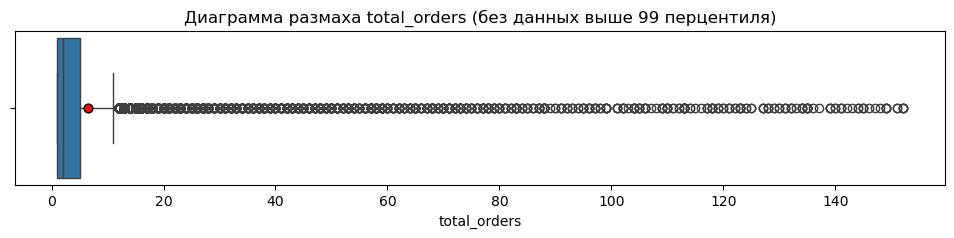

In [52]:
#Вычисляем значение 99 перцентиля
p99_orders = profile['total_orders'].quantile(0.99)
#Отфильтруем значения выше 99 перцентиля
f_pr = profile[(profile['total_orders'] <= p99_orders)]

plt.figure(figsize=(12,2))
sns.boxplot(x= f_pr['total_orders'])
#среднее:
mean = f_pr['total_orders'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=40, zorder=5)

plt.title('Диаграмма размаха total_orders (без данных выше 99 перцентиля)')
plt.show()

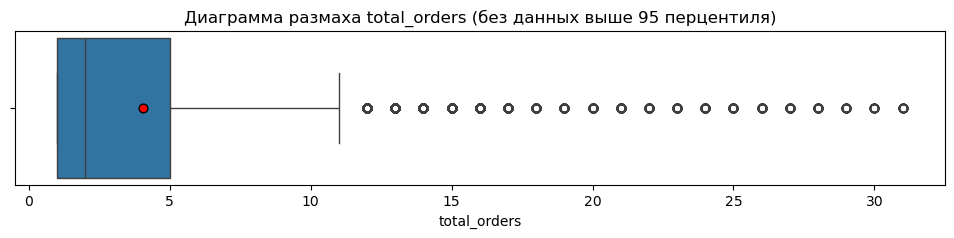

In [53]:
#Вычисляем значение 95 перцентиля
p95_orders = profile['total_orders'].quantile(0.95)
#Отфильтруем значения выше 95 перцентиля
f_pr = profile[(profile['total_orders'] <= p95_orders)]

plt.figure(figsize=(12,2))
sns.boxplot(x= f_pr['total_orders'])
#среднее:
mean = f_pr['total_orders'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=40, zorder=5)

plt.title('Диаграмма размаха total_orders (без данных выше 95 перцентиля)')
plt.show()

In [54]:
# Изучим статистические показатели по среднему количеству билетов в заказе
print("\nСтатистика по по среднему числу билетов в заказе (avg_tickets):")
display(profile['avg_tickets'].describe())


Статистика по по среднему числу билетов в заказе (avg_tickets):


count    21854.000000
mean         2.743129
std          0.913080
min          1.000000
25%          2.000000
50%          2.750000
75%          3.076923
max         11.000000
Name: avg_tickets, dtype: float64

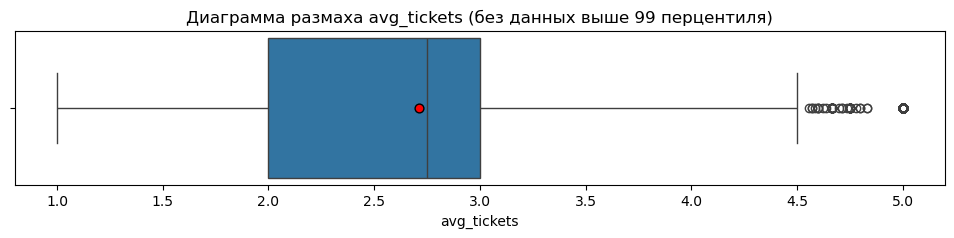

In [55]:
#Вычисляем значение 99 перцентиля
p99_tickets = profile['avg_tickets'].quantile(0.99)
#Отфильтруем значения выше 99 перцентиля
f_pr = profile[(profile['avg_tickets'] <= p99_tickets)]

plt.figure(figsize=(12,2))
sns.boxplot(x= f_pr['avg_tickets'])
#среднее:
mean = f_pr['avg_tickets'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=40, zorder=5)

plt.title('Диаграмма размаха avg_tickets (без данных выше 99 перцентиля)')
plt.show()

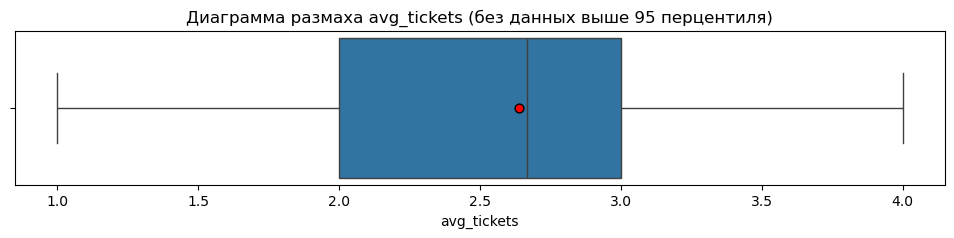

In [56]:
#Вычисляем значение 95 перцентиля
p95_tickets = profile['avg_tickets'].quantile(0.95)
#Отфильтруем значения выше 99 перцентиля
f_pr = profile[(profile['avg_tickets'] <= p95_tickets)]

plt.figure(figsize=(12,2))
sns.boxplot(x= f_pr['avg_tickets'])
#среднее:
mean = f_pr['avg_tickets'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=40, zorder=5)

plt.title('Диаграмма размаха avg_tickets (без данных выше 95 перцентиля)')
plt.show()

In [57]:
# Изучим статистические показатели по среднему количеству дней между покупками
print("\nСтатистика по по среднему количеству дней между покупками (avg_days_between, только пользователи с >=2 заказами):")
display(profile.loc[profile['total_orders']>=2, 'avg_days_between'].describe())


Статистика по по среднему количеству дней между покупками (avg_days_between, только пользователи с >=2 заказами):


count    13486.000000
mean        15.806190
std         22.212741
min          0.000000
25%          1.000000
50%          8.000000
75%         20.333333
max        148.000000
Name: avg_days_between, dtype: float64

***Произведем поиск аномалий, рассмотрев верхние перцентили по общему количеству заказов и среднему количеству билетов в заказе***

In [58]:
# Произведем поиск аномалий (перцентили)
# Рассмотрим верхние перцентили для total_orders и avg_tickets

print("Перцентили total_orders: 95% = {:.0f}, 99% = {:.0f}".format(p95_orders, p99_orders))
print("Перцентили avg_tickets: 95% = {:.2f}, 99% = {:.2f}".format(p95_tickets, p99_tickets))

# Рассчитаем количество и долю пользователей выше 95-го перцентиля по общему количеству заказов
n_p95_orders = (profile['total_orders'] > p95_orders).sum()
print("Пользователей с total_orders > 95%-перцентиля:", n_p95_orders, 
      "({:.2%} от всех)".format(n_p95_orders / n_users))

# Рассчитаем количество и долю пользователей выше 99-го перцентиля по общему количеству заказов
n_p99_orders = (profile['total_orders'] > p99_orders).sum()
print("Пользователей с total_orders > 99%-перцентиля:", n_p99_orders, 
      "({:.2%} от всех)".format(n_p99_orders / n_users))

# Рассчитаем количество и долю пользователей выше 95-го перцентиля по среднему количеству билетов в заказе
n_p95_tickets = (profile['avg_tickets'] > p95_tickets).sum()
print("Пользователей с avg_tickets > 95%-перцентиля:", n_p95_tickets, 
      "({:.2%} от всех)".format(n_p95_tickets / n_users))

# Рассчитаем количество и долю пользователей выше 99-го перцентиля по среднему количеству билетов в заказе
n_p99_tickets = (profile['avg_tickets'] > p99_tickets).sum()
print("Пользователей с avg_tickets > 99%-перцентиля:", n_p99_tickets, 
      "({:.2%} от всех)".format(n_p99_tickets / n_users))

Перцентили total_orders: 95% = 31, 99% = 152
Перцентили avg_tickets: 95% = 4.00, 99% = 5.00
Пользователей с total_orders > 95%-перцентиля: 1093 (5.00% от всех)
Пользователей с total_orders > 99%-перцентиля: 216 (0.99% от всех)
Пользователей с avg_tickets > 95%-перцентиля: 968 (4.43% от всех)
Пользователей с avg_tickets > 99%-перцентиля: 194 (0.89% от всех)


***Т.к. аномальные значения очевидно появляются по корпоративным закупкам, агрегаторам, ресейлерам, партнерским программам, а целью является анализ среднестатистического покупателя, произведем фильтрацию датасета, исключив строки с общим количеством заказов выше 95-го перцентиля и средним количеством билетов в заказе выше 99-го перцентиля***

In [59]:
fp = profile[(profile['total_orders'] <= p95_orders) & (profile['avg_tickets'] <= p99_tickets)].copy()
print("Размер датасета до фильтрации:", profile.shape[0])
print("Размер датасета после фильтрации:", fp.shape[0])
print(f"Датасет при фильтрации уменьшен на {profile.shape[0]-fp.shape[0]} строк, {(round(100 - fp.shape[0]/profile.shape[0]*100, 2))}%")

Размер датасета до фильтрации: 21854
Размер датасета после фильтрации: 20567
Датасет при фильтрации уменьшен на 1287 строк, 5.89%


### Промежуточный вывод после создания профиля пользователя

***В ходе построения профилей пользователей были получены ключевые характеристики поведения:***\
Всего пользователей в выборке: 21 854.\
Средняя выручка с одного заказа составляет 544.4 руб.\
Доля пользователей, совершивших ≥2 заказов — 61.71%, что говорит о высокой повторной активности.\
Доля пользователей, совершивших ≥5 заказов — 29.01%, то есть существенный сегмент лояльных клиентов.

**Распределение по общему числу заказов крайне неравномерное:**\
медиана = 2 заказа,\
при этом максимальные значения достигают 10 тыс. заказов.

**Анализ верхних перцентилей показал наличие выраженных аномалий:**\
5% пользователей имеют более 31 заказа, и в среднем покупают по 4 билета за заказ,\
1% — более 152 заказов и в среднем покупают 5 билетов за заказ.

На основании этого **для дальнейшего анализа были исключены пользователи**:
- с **числом заказов выше 95-го перцентиля**,
- со **средним числом билетов выше 99-го перцентиля**.

**Фильтрация уменьшила датасет на 5.89%**, удалив в основном аномальных или корпоративных пользователей / ресейлеров.\
Это сделало статистики по поведению пользователей более устойчивыми и репрезентативными.

## Исследовательский анализ данных

### Признаки первого заказа и их связи с возвращением пользователя на платформу

In [60]:
# Проверим данные
fp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20567 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           20567 non-null  object        
 1   first_order_dt    20567 non-null  datetime64[ns]
 2   last_order_dt     20567 non-null  datetime64[ns]
 3   first_device      20567 non-null  category      
 4   first_region      20567 non-null  category      
 5   first_partner     20567 non-null  category      
 6   first_genre       20567 non-null  category      
 7   total_orders      20567 non-null  int64         
 8   avg_revenue       20567 non-null  float64       
 9   avg_tickets       20567 non-null  float64       
 10  avg_days_between  12356 non-null  float64       
 11  is_two            20567 non-null  int64         
 12  is_five           20567 non-null  int64         
dtypes: category(4), datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 

In [61]:
fp.head()

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_partner,first_genre,total_orders,avg_revenue,avg_tickets,avg_days_between,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0


#### Изучение распределения пользователей по признакам

***Изучим распределение пользователей по признакам***

In [62]:
# Сгруппируем пользователей по типу их первого мероприятия
genre_stats = (
    fp['first_genre']
    .value_counts()
    .reset_index(name='users_count')
    .rename(columns={'index': 'first_genre'})
)
genre_stats['share%'] = round(genre_stats['users_count'] / fp.shape[0]*100, 2)
display(genre_stats)

,first_genre,users_count,share%
0,концерты,9142,44.45
1,другое,5094,24.77
2,театр,4033,19.61
3,стендап,1055,5.13
4,спорт,750,3.65
5,выставки,399,1.94
6,ёлки,94,0.46


**Выраженными "точками входа" являются типы мероприятий:**
- концерты (9142 покупателей, 44,45% от общего количества покупателей),
- другое (5094 покупателей, 24,77% от общего количества покупателей),
- театр (4033 покупателей, 19,61% от общего количества покупателей).

In [63]:
# Сгруппируем пользователей по типу устройства, с которого совершена первая покупка
device_stats = (
    fp['first_device']
    .value_counts()
    .reset_index(name='users_count')
    .rename(columns={'index': 'first_device'})
)
device_stats['share%'] = round(device_stats['users_count'] / fp.shape[0]*100, 2)
display(device_stats)

,first_device,users_count,share%
0,mobile,17067,82.98
1,desktop,3500,17.02


**Выраженной "точкой входа" являются**\
мобильные устройства - 17067 (83%) покупателей делают с них первый заказ.

In [64]:
# Сгруппируем пользователей по региону проведения мероприятия из первого заказа
region_stats = (
    fp['first_region']
    .value_counts()
    .reset_index(name='users_count')
    .rename(columns={'index': 'first_region'})
)
region_stats['share%'] = round(region_stats['users_count'] / fp.shape[0]*100, 2)
display(region_stats.head(10))
display(region_stats.tail(10))

,first_region,users_count,share%
0,Каменевский регион,6726,32.70
1,Североярская область,3546,17.24
2,Широковская область,1170,5.69
3,Озернинский край,656,3.19
4,Малиновоярский округ,511,2.48
5,Травяная область,465,2.26
6,Шанырский регион,462,2.25
7,Светополянский округ,434,2.11
8,Речиновская область,418,2.03
9,Яблоневская область,394,1.92


,first_region,users_count,share%
71,Теплоозёрский округ,3,0.01
72,Лесноярский край,3,0.01
73,Крутоводский регион,3,0.01
74,Верховинская область,2,0.01
75,Тихогорская область,2,0.01
76,Залесский край,2,0.01
77,Верхозёрский край,1,0.00
78,Светолесский край,1,0.00
79,Сосноводолинская область,1,0.00
80,Яснопольский округ,1,0.00


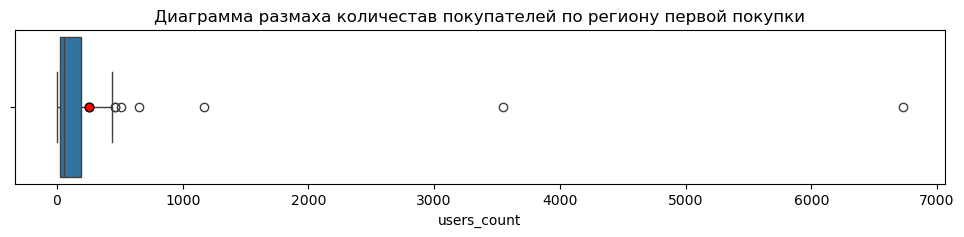

In [65]:
plt.figure(figsize=(12,2))
sns.boxplot(x= region_stats['users_count'])
#среднее:
mean = region_stats['users_count'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=40, zorder=5)

plt.title('Диаграмма размаха количестав покупателей по региону первой покупки')
plt.show()

In [66]:
region_stats.describe()

,users_count,share%
count,81.00000,81.000000
mean,253.91358,1.234198
std,842.23036,4.094809
min,1.00000,0.000000
25%,21.00000,0.100000
50%,52.00000,0.250000
75%,189.00000,0.920000
max,6726.00000,32.700000


In [67]:
# Применим функцию для расчета границ выбросов
limits(region_stats['users_count'])

Значения ниже -231.0 или выше 441.0 являются выбросами


***Оценка распределения данных по полю региона первой покупки***\
Распределение имеет положительную ассиметрию.\
Значения среднего арифметического и медианы не близки.\
Около 50% данных находятся в диапазоне от 21 до 189.\
Основной разброс данных находится в интервале от 1 до 434, значения выше 441 являются выбросами.\
Положительные выбросы по полю users_count могут объясняться большей покупательской активностью в регионе, связанной с широким ассортиментом мероприятий и/или более высокими финансовыми возможностями покупателей.

**Выраженными "точками входа" являются регионы:**
- Каменевский регион (6726 покупателей, 32,7% от общего количества покупателей),
- Североярская область (3546 покупателей, 17,24% от общего количества покупателей),
- Широковская область (1170 покупателей, 5,69% от общего количества покупателей).

In [68]:
# Сгруппируем пользователей по билетному партнёру, продавшему билеты на первый заказ
partner_stats = (
    fp['first_partner']
    .value_counts()
    .reset_index(name='users_count')
    .rename(columns={'index': 'first_partner'})
)
partner_stats['share%'] = round(partner_stats['users_count'] / fp.shape[0]*100, 2)
display(partner_stats.head(10))
display(partner_stats.tail(10))

,first_partner,users_count,share%
0,Билеты без проблем,4899,23.82
1,Мой билет,2830,13.76
2,Лови билет!,2685,13.05
3,Билеты в руки,2405,11.69
4,Облачко,2097,10.20
5,Весь в билетах,1222,5.94
6,Лучшие билеты,1121,5.45
7,Прачечная,546,2.65
8,Край билетов,436,2.12
9,Дом культуры,337,1.64


,first_partner,users_count,share%
26,Шоу начинается!,18,0.09
27,КарандашРУ,14,0.07
28,Кино билет,9,0.04
29,Вперёд!,7,0.03
30,Билет по телефону,6,0.03
31,Лимоны,2,0.01
32,Тех билет,2,0.01
33,Зе Бест!,1,0.00
34,Дырокол,0,0.00
35,Билеты в интернете,0,0.00


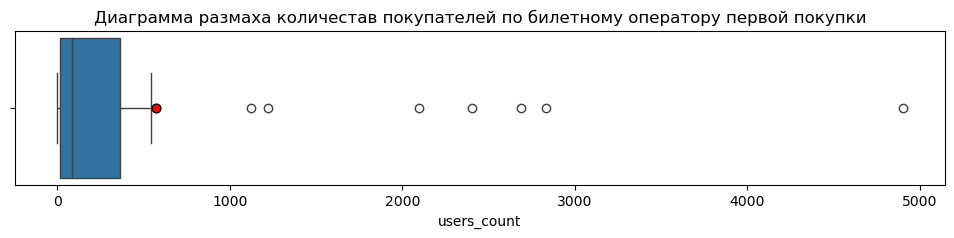

In [69]:
plt.figure(figsize=(12,2))
sns.boxplot(x= partner_stats['users_count'])
#среднее:
mean = partner_stats['users_count'].mean()
plt.scatter(mean, 0, color='red', edgecolor='black', s=40, zorder=5)

plt.title('Диаграмма размаха количестав покупателей по билетному оператору первой покупки')
plt.show()

In [70]:
partner_stats.describe()

,users_count,share%
count,36.000000,36.000000
mean,571.305556,2.776944
std,1087.259355,5.286417
min,0.000000,0.000000
25%,17.000000,0.085000
50%,86.500000,0.420000
75%,361.750000,1.760000
max,4899.000000,23.820000


In [71]:
# Применим функцию для расчета границ выбросов
limits(partner_stats['users_count'])

Значения ниже -500.12 или выше 878.88 являются выбросами


***Оценка распределения данных по полю билетного оператора первой покупки***\
Распределение имеет положительную ассиметрию.\
Значения среднего арифметического и медианы далеки.\
Около 50% данных находятся в диапазоне от 17 до 362.\
Основной разброс данных находится в интервале от 0 до 546, значения выше 879 являются выбросами.\
Положительные выбросы по полю users_count могут объясняться большей популярностью билетного оператора, связанной с широким ассортиментом мероприятий, большей известностью и/или низкой комиссией.

**Выраженными "точками входа" являются семь билетных операторов:**
- Билеты без проблем (4899 покупателей, 23,82% от общего количества покупателей),
- Мой билет (2830 покупателей, 23,82% от общего количества покупателей),
- Лови билет! (2685 покупателей, 13,05% от общего количества покупателей),
- Билеты в руки (2405 покупателей, 11,69% от общего количества покупателей),
- Облачко (2097 покупателей, 10,2% от общего количества покупателей),
- Весь в билетах (1222 покупателей, 5,9% от общего количества покупателей),
- Лучшие билеты (1121 покупателей, 5,45% от общего количества покупателей).


**ПРОМЕЖУТОЧНЫЙ ВЫВОД**

**Выраженными "точками входа" по количеству пользователей являются:**

***типы мероприятий:***
- концерты (9142 покупателей, 44,45% от общего количества покупателей),
- другое (5094 покупателей, 24,77% от общего количества покупателей),
- театр (4033 покупателей, 19,61% от общего количества покупателей);

***устройства:***
- мобильные устройства (17067 покупателей, 83% от общего количества покупателей);

***регионы:***
- Каменевский регион (6726 покупателей, 32,7% от общего количества покупателей),
- Североярская область (3546 покупателей, 17,24% от общего количества покупателей),
- Широковская область (1170 покупателей, 5,69% от общего количества покупателей);

***билетные операторы:***
- Билеты без проблем (4899 покупателей, 23,82% от общего количества покупателей),
- Мой билет (2830 покупателей, 23,82% от общего количества покупателей),
- Лови билет! (2685 покупателей, 13,05% от общего количества покупателей),
- Билеты в руки (2405 покупателей, 11,69% от общего количества покупателей),
- Облачко (2097 покупателей, 10,2% от общего количества покупателей),
- Весь в билетах (1222 покупателей, 5,9% от общего количества покупателей),
- Лучшие билеты (1121 покупателей, 5,45% от общего количества покупателей).


#### Задача 4.1.2. Анализ возвратов пользователей

***Проанализируем покупателей, возвращающихся на платформу***

***Проанализируем распределение пользователей с >=2 заказами по типу их первого мероприятия***

In [72]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20567 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           20567 non-null  object        
 1   first_order_dt    20567 non-null  datetime64[ns]
 2   last_order_dt     20567 non-null  datetime64[ns]
 3   first_device      20567 non-null  category      
 4   first_region      20567 non-null  category      
 5   first_partner     20567 non-null  category      
 6   first_genre       20567 non-null  category      
 7   total_orders      20567 non-null  int64         
 8   avg_revenue       20567 non-null  float64       
 9   avg_tickets       20567 non-null  float64       
 10  avg_days_between  12356 non-null  float64       
 11  is_two            20567 non-null  int64         
 12  is_five           20567 non-null  int64         
dtypes: category(4), datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 

In [73]:
fp.describe()

,first_order_dt,last_order_dt,total_orders,avg_revenue,avg_tickets,avg_days_between,is_two,is_five
count,20567,20567,20567.000000,20567.000000,20567.000000,12356.000000,20567.000000,20567.000000
mean,2024-08-13 00:01:57.625321984,2024-09-16 08:24:35.917732352,4.070890,544.261422,2.712880,17.109693,0.599504,0.254583
min,2024-06-01 00:00:00,2024-06-01 00:00:00,1.000000,-10.770000,1.000000,0.000000,0.000000,0.000000
25%,2024-06-30 00:00:00,2024-08-22 00:00:00,1.000000,201.955000,2.000000,1.000000,0.000000,0.000000
50%,2024-08-13 00:00:00,2024-10-01 00:00:00,2.000000,456.858182,2.750000,9.500000,1.000000,0.000000
75%,2024-09-24 00:00:00,2024-10-20 00:00:00,5.000000,778.960000,3.090909,22.250000,1.000000,1.000000
max,2024-10-31 00:00:00,2024-10-31 00:00:00,31.000000,2628.421739,5.000000,148.000000,1.000000,1.000000
std,NaN,NaN,5.129655,437.776977,0.880810,22.887984,0.490011,0.435637


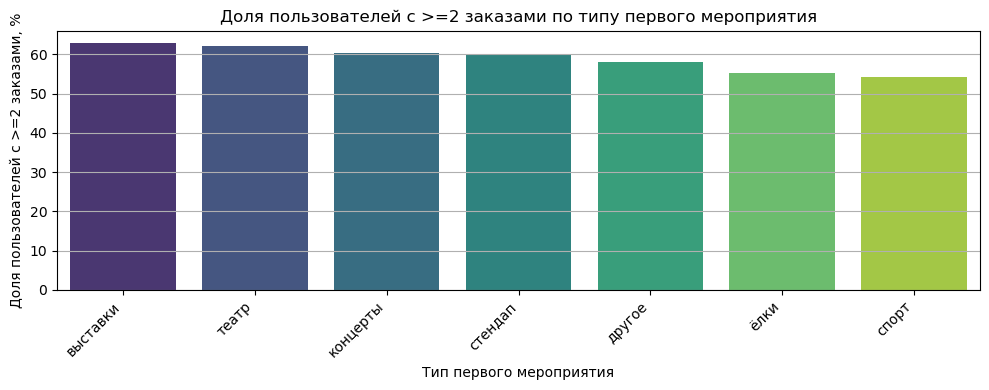

In [74]:
# Рассчитываем долю пользователей с >=2 заказами внутри каждого типа мероприятия
genre_stats = (
    fp.groupby('first_genre', observed=True)['is_two']
      .mean()
      .reset_index(name='share')
)

# Переводим долю в проценты
genre_stats['share%'] = (genre_stats['share'] * 100).round(2)

# Сортируем по убыванию доли повторных заказов
genre_stats_o = genre_stats.sort_values(by='share%', ascending=False)

# Строим barplot
plt.figure(figsize=(10, 4))
sns.barplot(
    x='first_genre',
    y='share%',
    hue='first_genre',
    data=genre_stats_o,
    palette='viridis',
    dodge=False,
    legend=False,
    order=genre_stats_o['first_genre'],     # порядок категорий на оси X
    hue_order=genre_stats_o['first_genre']  # порядок цветов для hue
)

plt.xlabel('Тип первого мероприятия')
plt.ylabel('Доля пользователей с >=2 заказами, %')
plt.xticks(rotation=45, ha='right')
plt.title('Доля пользователей с >=2 заказами по типу первого мероприятия')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


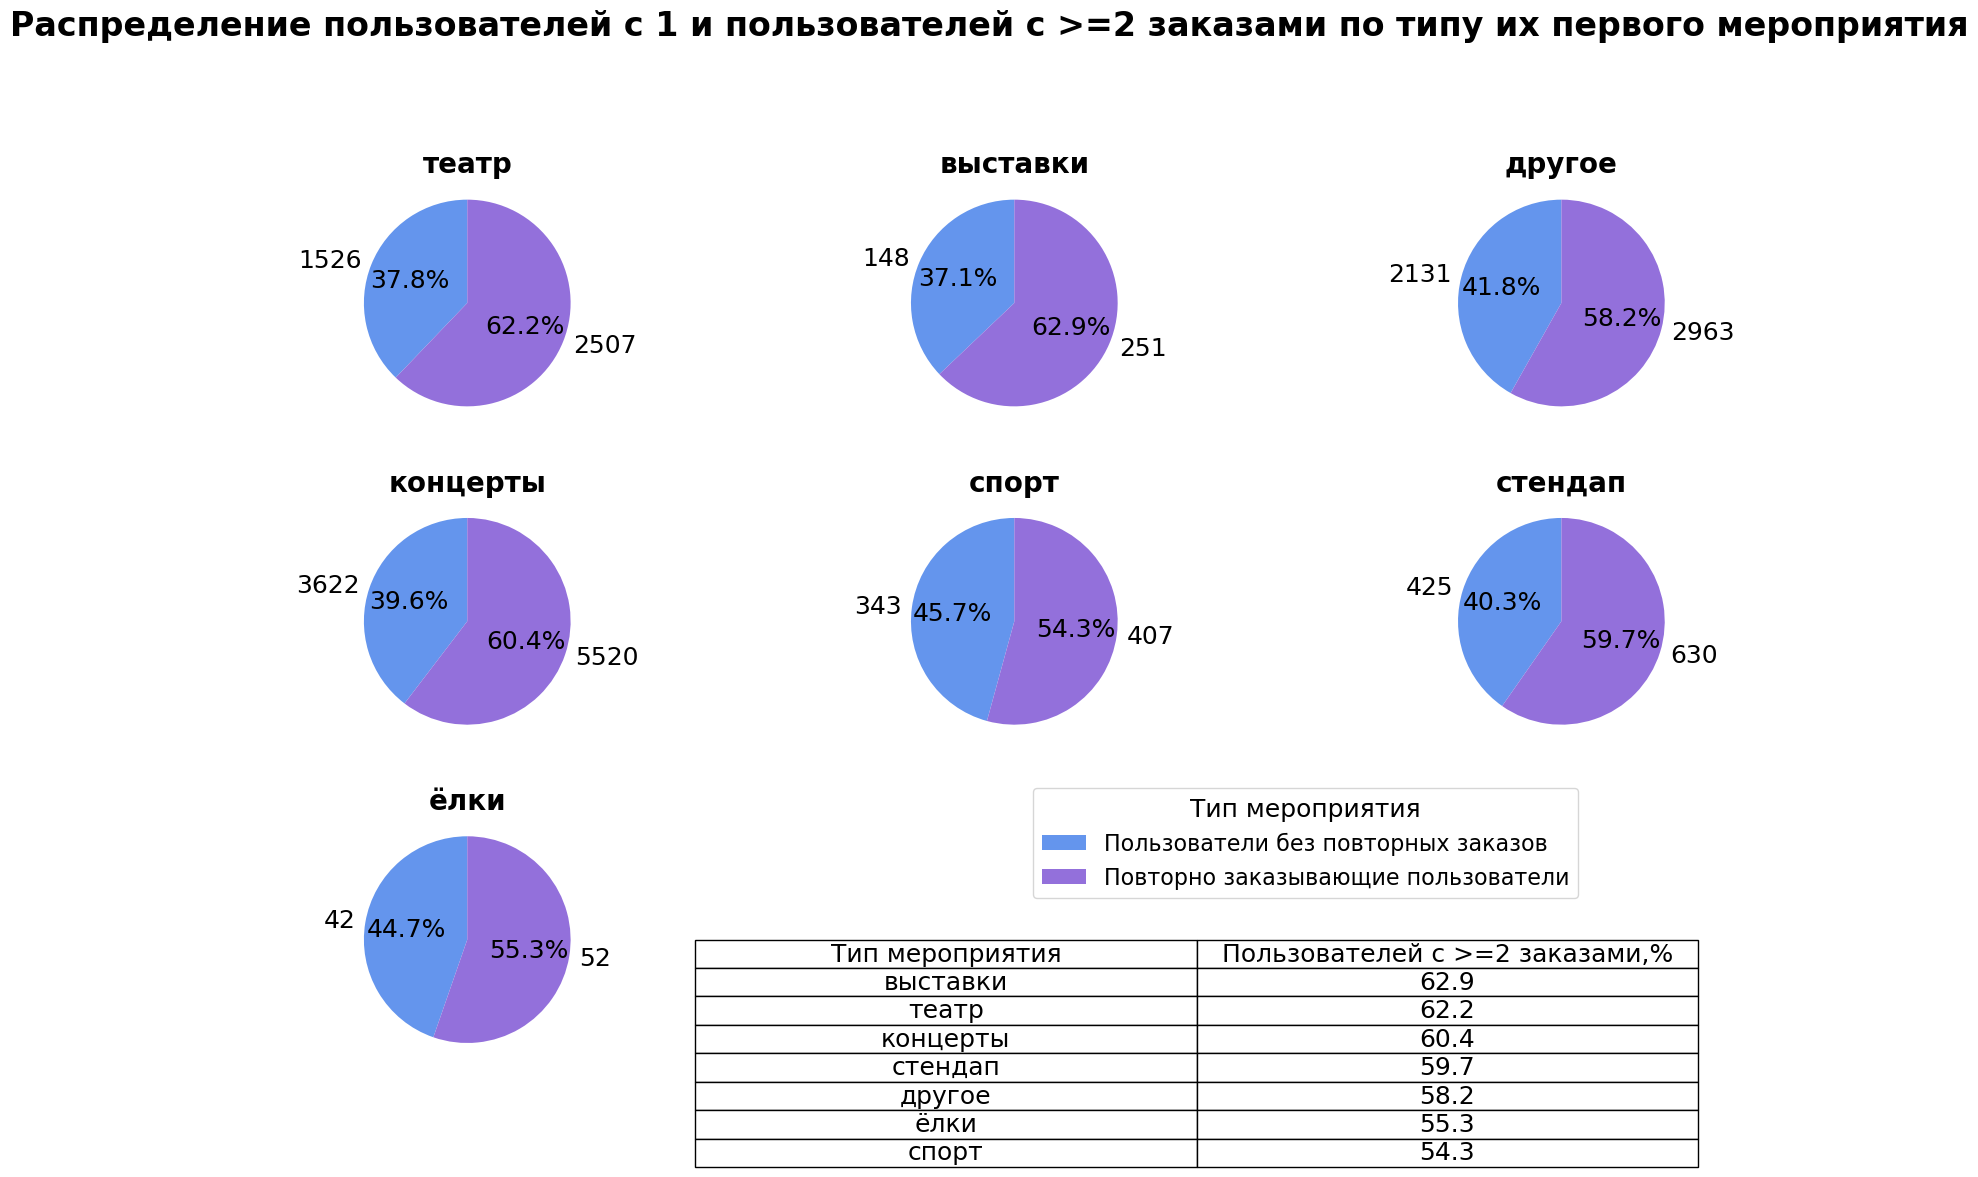

In [75]:
# Изучаем распределение пользователей с >=2 заказами по типу их первого мероприятия
unique_categories = fp['first_genre'].unique()
n_cats = len(unique_categories)

# Настраиваем сетку подграфиков
rows = int(np.ceil(n_cats / 3))
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
axes = axes.flatten()

# Создаем таблицу для подсчёта процента пользователей с >=2 заказами
network_share = []

# Устанавливаем цвета и подписи для категорий
colors = ['#6495ED', '#9370DB']
labels_map = {0: 'Пользователи без повторных заказов', 1: 'Повторно заказывающие пользователи'}

for i, cat in enumerate(unique_categories):
    ax = axes[i]
    df2 = fp[fp['first_genre'] == cat]
    df2_counts = df2['is_two'].value_counts().sort_index()

# Проверяем, что присутствуют оба значения (0 и 1)
    if len(df2_counts) == 1:
        df2_counts = df2_counts.reindex([0, 1], fill_value=0) # реиндексируем, чтобы избежать future warning
# Строим круговые диаграммы
    wedges, texts, autotexts = ax.pie(
        df2_counts,
        labels=df2_counts,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 18, 'color': 'black'},
        colors=colors
    )
    ax.set_title(cat, fontsize=20, fontweight='bold', pad=12)
    ax.axis('equal')

# Сохраняем данные для таблицы
    total = df2_counts.sum()
    network_percent = (df2_counts.loc[1] / total) * 100 # используем loc, чтобы избежать future warning
    network_share.append({'Тип мероприятия': cat, 'Пользователей с >=2 заказами,%': round(network_percent, 1)})

# Удаляем лишние пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Создаем общую легенду
fig.legend(
    labels_map.values(),
    title='Тип мероприятия',
    loc='lower right',
    bbox_to_anchor=(0.8, 0.48),
    fontsize=16,
    title_fontsize=18
)

# Создаём данные для таблицы под графиками
df_network = pd.DataFrame(network_share).sort_values(by='Пользователей с >=2 заказами,%', ascending=False)

# Добавляем таблицу
plt.subplots_adjust(bottom=0.4, hspace=0.4)
table = plt.table(
    cellText=df_network.values,
    colLabels=df_network.columns,
    cellLoc='center',
    loc='bottom',
    bbox=[1, -0.5, 2.2, 1]  # высота таблицы
)
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1, 2)   # размер ячеек

# Создаем заголовок
fig.suptitle(
    'Распределение пользователей c 1 и пользователей с >=2 заказами по типу их первого мероприятия',
    fontsize=24,
    fontweight='bold',
    y=0.98
)

plt.show()

**Выраженные "точки входа" (по типам мероприятий) по ***доле*** пользователей, повторно заказывающих билеты ***от числа пользователей, впервые купивших билеты на данный тип мероприятия*** отсутствуют** - разница между минимумом и максимумом - 8,6%
  
**Чаще всего повторный заказ делают пользователи, которые впервые приобретали билеты на** ***выставки*** - 62,9% покупателей, выбравших первым этот тип мероприятия, делают повторный заказ на платформе.

***Проанализируем распределение пользователей с >=2 заказами по типу устройства, с которого совершена первая покупка***

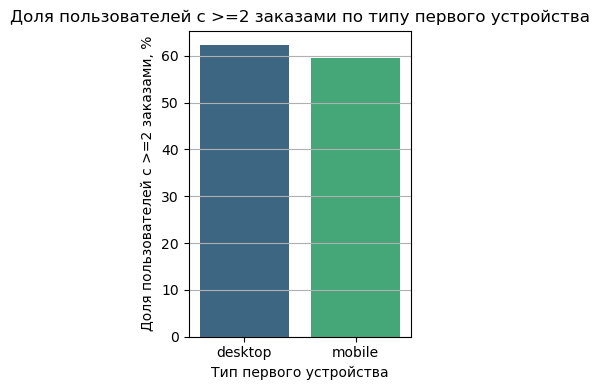

In [76]:
# Рассчитываем долю пользователей с >=2 заказами внутри каждого типа устройства
device_stats = (
    fp.groupby('first_device', observed=True)['is_two']
      .mean()
      .reset_index(name='share')
)

# Переводим долю в проценты
device_stats['share%'] = (device_stats['share'] * 100).round(2)

# Сортируем по убыванию доли повторных заказов
device_stats_o = device_stats.sort_values(by='share%', ascending=False)

# Строим barplot
plt.figure(figsize=(3, 4))
sns.barplot(
    x='first_device',
    y='share%',
    hue='first_device',
    data=device_stats_o,
    palette='viridis',
    dodge=False,
    legend=False,
    order=device_stats_o['first_device'],     # порядок категорий на оси X
    hue_order=device_stats_o['first_device']  # порядок цветов для hue
)

plt.xlabel('Тип первого устройства')
plt.ylabel('Доля пользователей с >=2 заказами, %')
plt.title('Доля пользователей с >=2 заказами по типу первого устройства')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

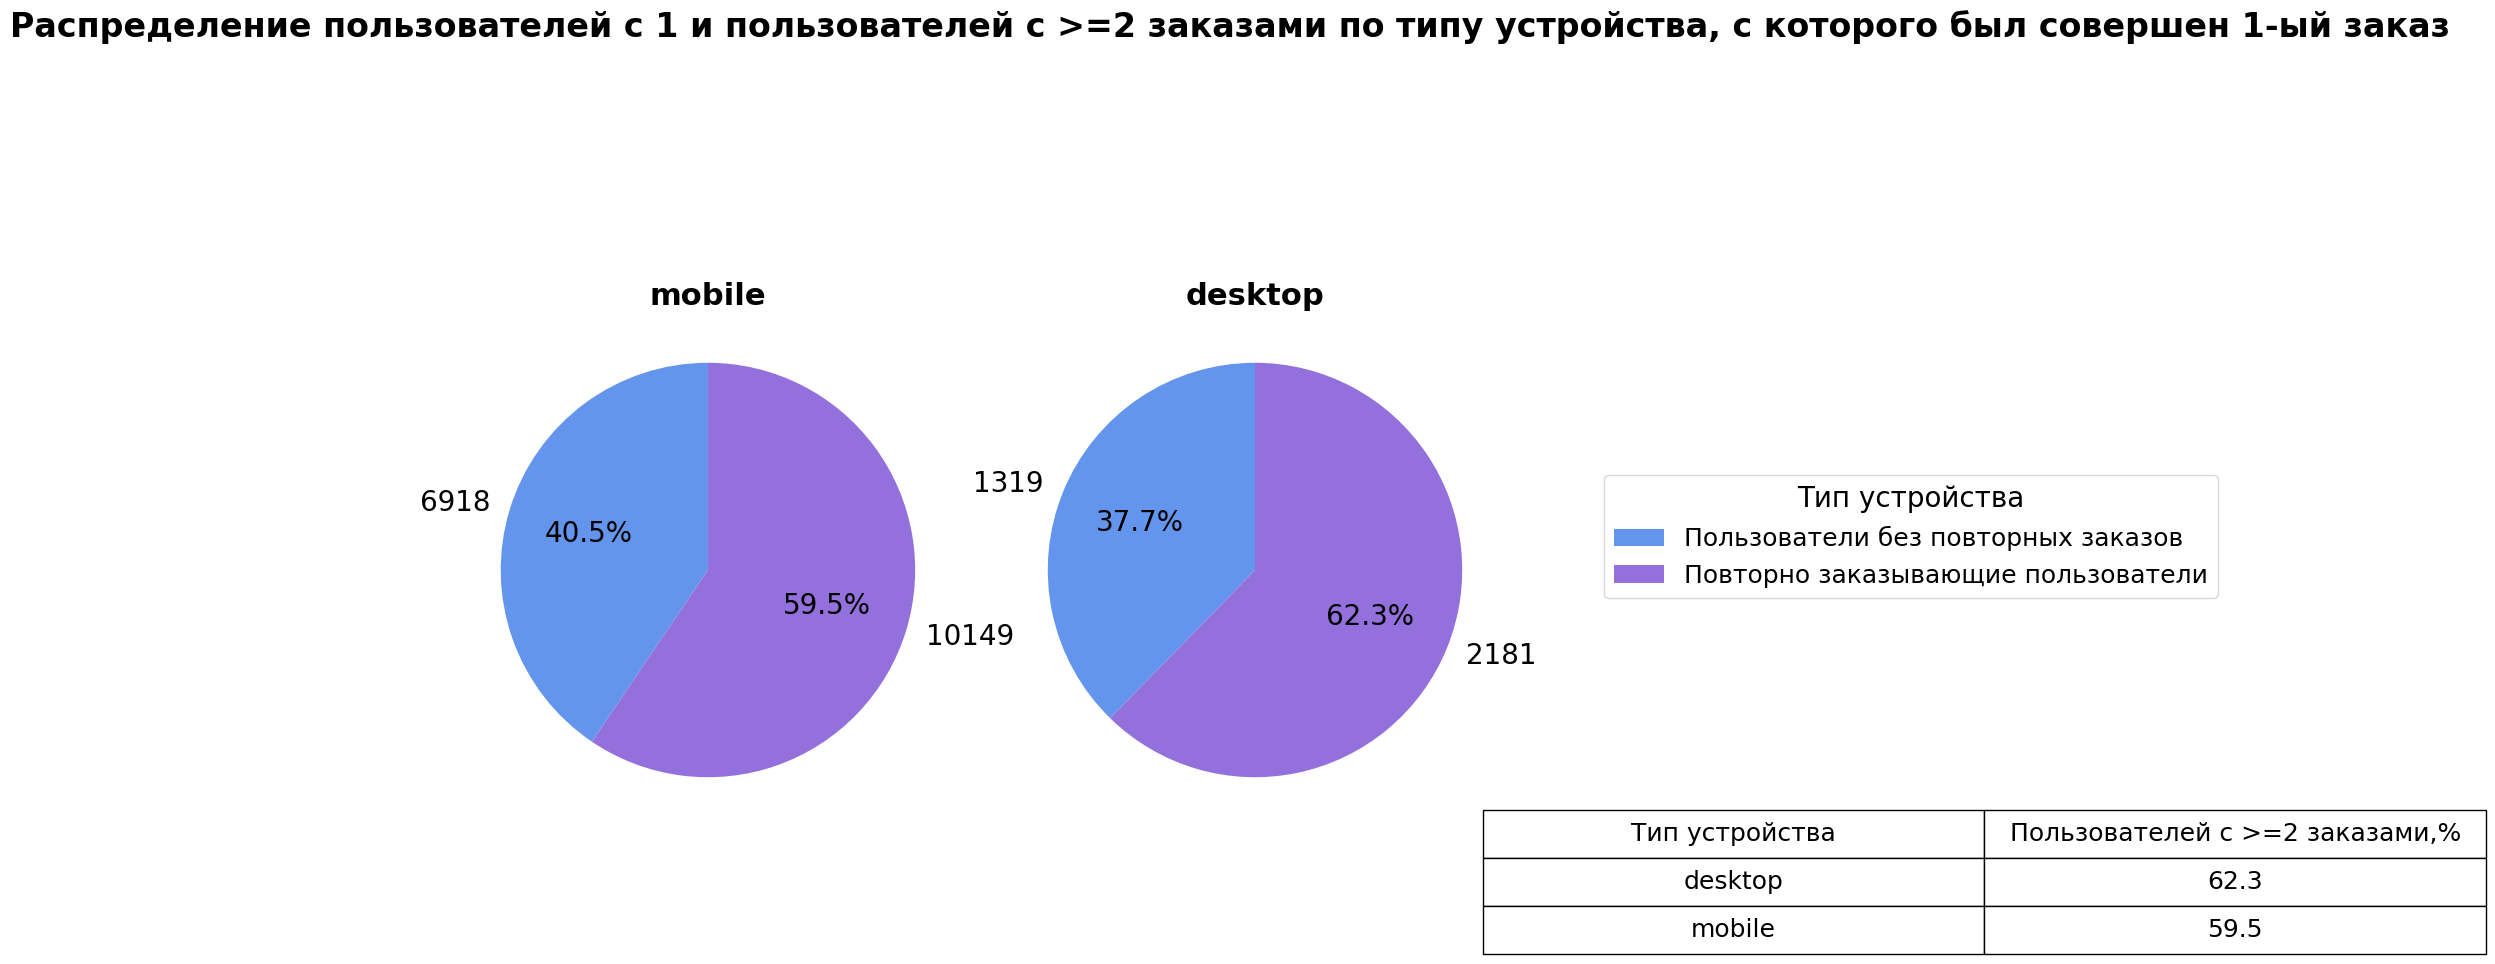

In [77]:
# Изучаем распределение пользователей с >=2 заказами по типу устройства, с которого совершена первая покупка
unique_categories = fp['first_device'].unique()
n_cats = len(unique_categories)

# Настраиваем сетку подграфиков
rows = int(np.ceil(n_cats / 3))
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 10 * rows))
axes = axes.flatten()

# Создаем таблицу для подсчёта процента пользователей с >=2 заказами
network_share = []

# Устанавливаем цвета и подписи для категорий
colors = ['#6495ED', '#9370DB']
labels_map = {0: 'Пользователи без повторных заказов', 1: 'Повторно заказывающие пользователи'}

for i, cat in enumerate(unique_categories):
    ax = axes[i]
    df2 = fp[fp['first_device'] == cat]
    df2_counts = df2['is_two'].value_counts().sort_index()

# Проверяем, что присутствуют оба значения (0 и 1)
    if len(df2_counts) == 1:
        df2_counts = df2_counts.reindex([0, 1], fill_value=0)

# Строим круговые диаграммы
    wedges, texts, autotexts = ax.pie(
        df2_counts,
        labels=df2_counts,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 20, 'color': 'black'},
        colors=colors
    )
    ax.set_title(cat, fontsize=22, fontweight='bold', pad=18)
    ax.axis('equal')

# Сохраняем данные для таблицы
    total = df2_counts.sum()
    network_percent = (df2_counts.loc[1] / total) * 100 # используем loc, чтобы избежать future warning
    network_share.append({'Тип устройства': cat, 'Пользователей с >=2 заказами,%': round(network_percent, 1)})

# Удаляем лишние пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Создаем общую легенду
fig.legend(
    labels_map.values(),
    title='Тип устройства',
    loc='lower right',
    bbox_to_anchor=(1, 0.6),
    fontsize=18,
    title_fontsize=20
)

# Создаём данные для таблицы под графиками
df_network = pd.DataFrame(network_share).sort_values(by='Пользователей с >=2 заказами,%', ascending=False)

# Добавляем таблицу
plt.subplots_adjust(bottom=0.4, hspace=0.4)
table = plt.table(
    cellText=df_network.values,
    colLabels=df_network.columns,
    cellLoc='center',
    loc='bottom',
    bbox=[1, -0.3, 2.2, 0.3]  # высота таблицы
)
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1, 2)   # размер ячеек

# Создаем заголовок
fig.suptitle(
    'Распределение пользователей c 1 и пользователей с >=2 заказами по типу устройства, с которого был совершен 1-ый заказ',
    fontsize=24,
    fontweight='bold',
    y=1.2
)

plt.show()

**Выраженные "точки входа" (по типам устройств) по ***доле*** пользователей, повторно заказывающих билеты ***от числа пользователей, впервые купивших билеты через данный тип устройства*** отсутствуют** - разница между минимумом и максимумом - 2,8%
  
**Чаще повторный заказ делают пользователи, которые впервые приобретали билеты через** ***мобильное устройство*** - 62,3% покупателей, выбравших первым этот тип мероприятия, делают повторный заказ на платформе.

***Проанализируем распределение пользователей c 1 и пользователей с >=2 заказами по региону проведения мероприятия из первого заказа***

In [78]:
# Рассчитываем долю пользователей с >=2 заказами внутри каждого региона
region_stats = (
    fp.groupby('first_region', observed=True)
      .agg(
           repeat_share=('is_two', 'mean'),
           users_count=('first_region', 'count')
      )
      .reset_index()
)

In [79]:
# Переводим долю в проценты
region_stats1=region_stats.copy()
region_stats1['share%'] = (region_stats1['repeat_share'] * 100).round(2)

# Выбираем ТОП-10 регионов по доле возвращающихся покупателей
top_regions1 = (
    region_stats1.sort_values(by='share%', ascending=False)
                .head(10)['first_region']
                .tolist()
)
region_stats_o1 = region_stats1[region_stats1['first_region'].isin(top_regions1)].sort_values(by='share%', ascending=False)

# Выводим ТОП-10 регионов по доле возвращающихся покупателей
region_stats_o1.head(10)

,first_region,repeat_share,users_count,share%
5,Верхозёрский край,1.000000,1,100.00
46,Озернопольская область,0.884615,26,88.46
51,Радужнопольский край,0.761905,21,76.19
36,Лесостепной край,0.703704,54,70.37
12,Горноземский регион,0.680000,25,68.00
33,Лесноярский край,0.666667,3,66.67
71,Тихолесский край,0.666667,9,66.67
79,Ягодиновская область,0.650000,60,65.00
11,Горицветская область,0.649123,228,64.91
76,Шанырский регион,0.645022,462,64.50


***Так как сегменты с малым количеством пользователей слишком чувствуительны к изменением, они не репрезентативны.\
Для получения корректной статистики оставляем в наборе данных только регионы со 100+ пользователями.***

In [80]:
# Для обоих графиков:
# Оставляем только регионы, где достаточно наблюдений (>=100)
region_stats = region_stats[region_stats['users_count'] >= 100]

# Переводим долю в проценты
region_stats['share%'] = (region_stats['repeat_share'] * 100).round(2)

# Выбираем ТОП-10 регионов по доле возвращающихся покупателей
top_regions = (
    region_stats.sort_values(by='share%', ascending=False)
                .head(10)['first_region']
                .tolist()
)
region_stats_o = region_stats[region_stats['first_region'].isin(top_regions)].sort_values(by='share%', ascending=False)

# Выводим ТОП-10 регионов по доле возвращающихся покупателей (исключив регионы с числом покупателей < 100)
region_stats_o.head(10)

,first_region,repeat_share,users_count,share%
11,Горицветская область,0.649123,228,64.91
76,Шанырский регион,0.645022,462,64.50
57,Светополянский округ,0.640553,434,64.06
77,Широковская область,0.638462,1170,63.85
54,Речицкий регион,0.633880,183,63.39
2,Берёзовская область,0.627273,110,62.73
7,Ветренский регион,0.625000,144,62.50
60,Североярская область,0.624365,3546,62.44
52,Речиновская область,0.617225,418,61.72
18,Заречная область,0.616216,185,61.62


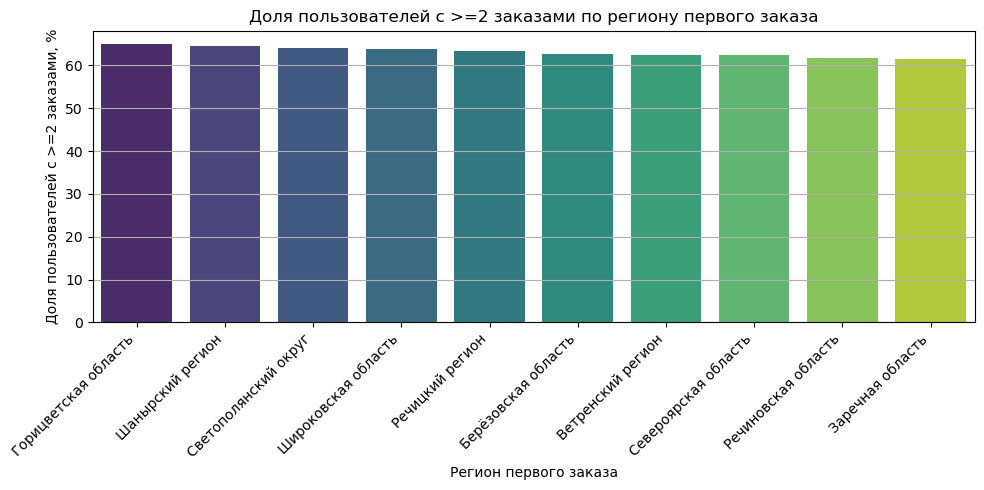

In [81]:
# График №1
# Строим barplot
plt.figure(figsize=(10, 5))
sns.barplot(
    x='first_region',
    y='share%',
    hue='first_region',
    data=region_stats_o,
    palette='viridis',
    dodge=False,
    legend=False,
    order=region_stats_o['first_region'],     # порядок категорий на оси X
    hue_order=region_stats_o['first_region']  # порядок цветов для hue
)

plt.xlabel('Регион первого заказа')
plt.ylabel('Доля пользователей с >=2 заказами, %')
plt.xticks(rotation=45, ha='right')
plt.title('Доля пользователей с >=2 заказами по региону первого заказа')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

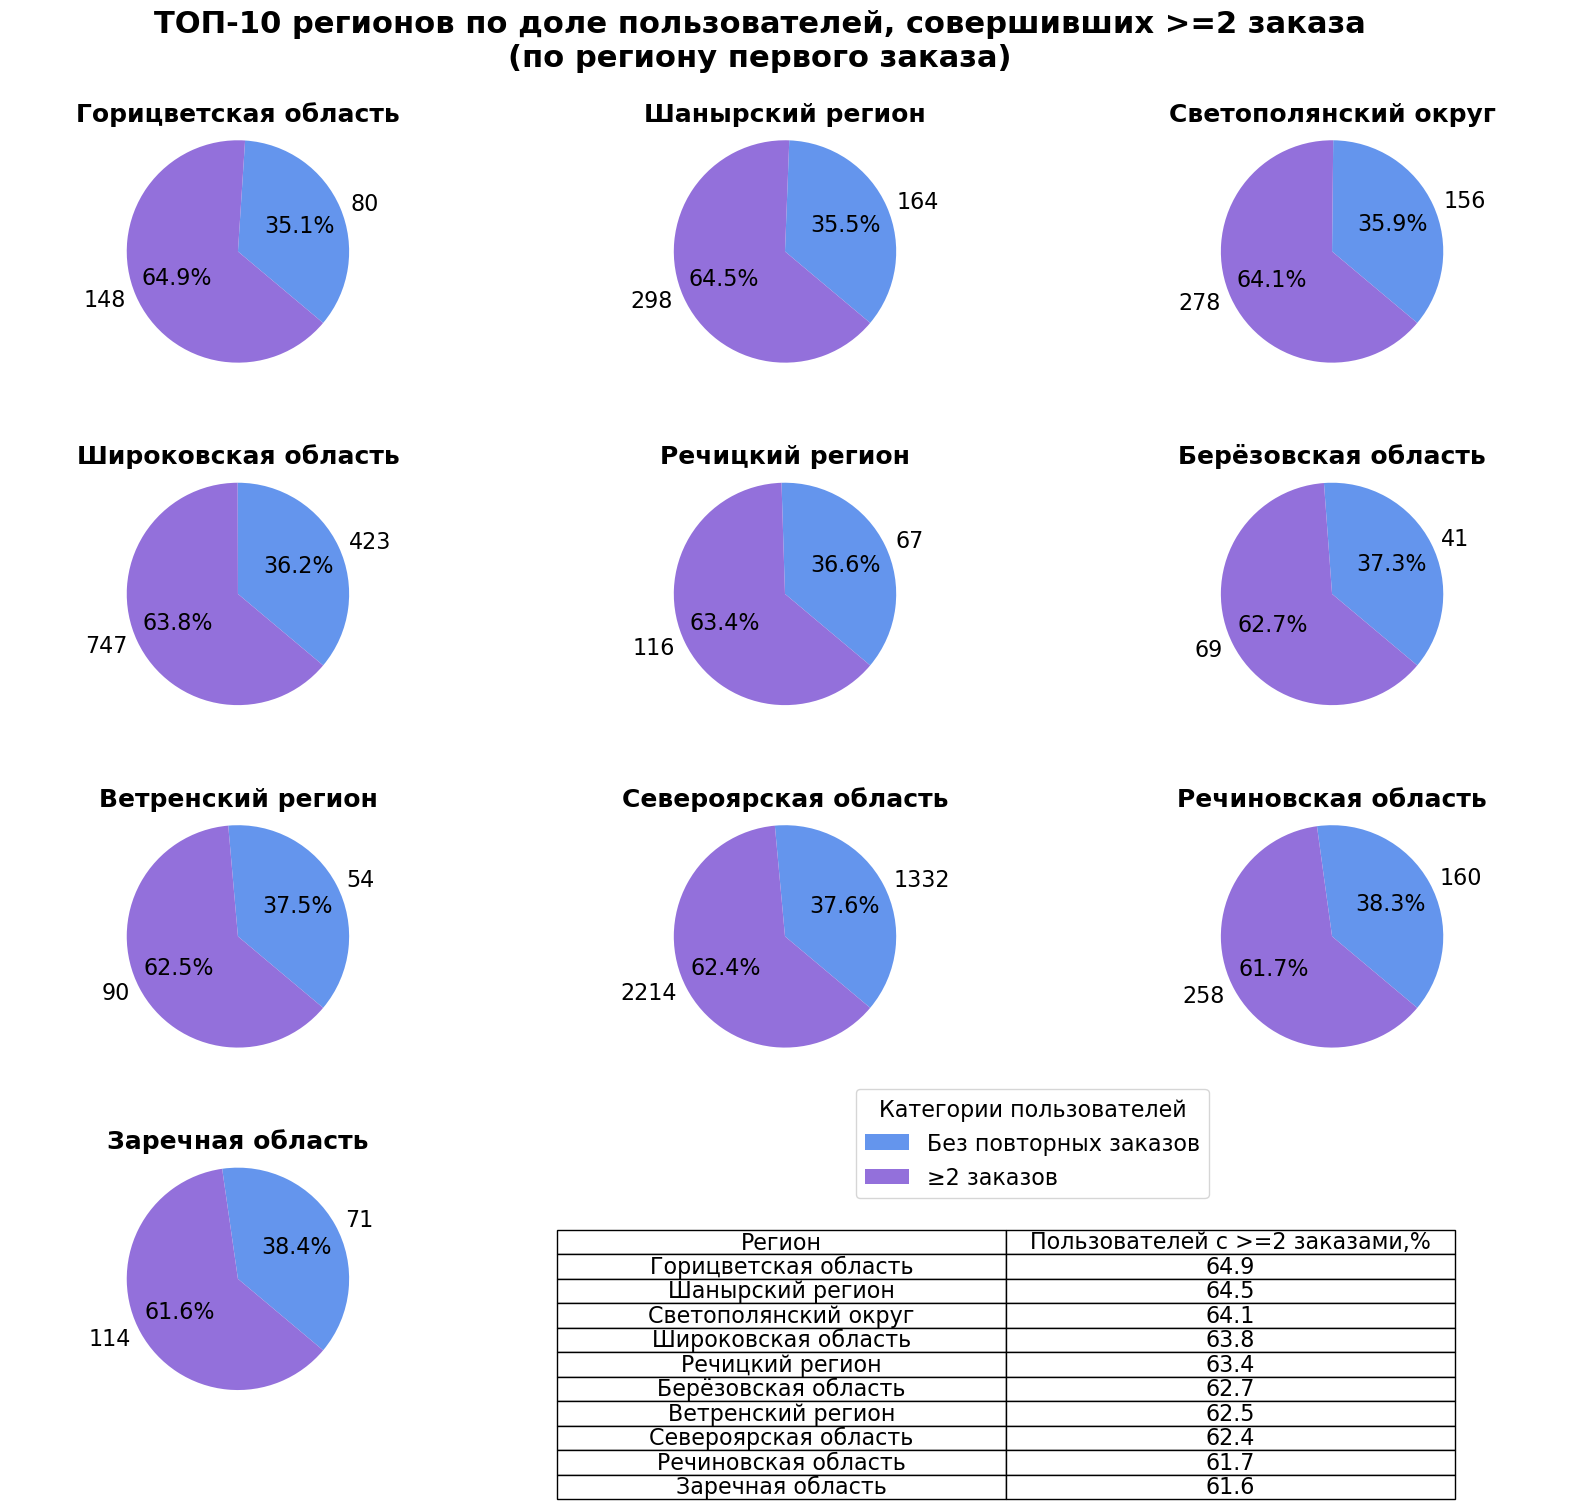

In [82]:
# # График №2
# Изучаем распределение пользователей c 1 и пользователей с >=2 заказами по региону, из которого совершена первая покупка
# Оставляем в исходном профиле только ТОП-10 регионов по доле возвращающихся покупателей с их общим количеством от 100 и более
fp_top = fp[fp['first_region'].isin(top_regions)]

unique_categories = top_regions
n_cats = len(unique_categories)

# Настраиваем сетку подграфиков
rows = int(np.ceil(n_cats / 3))
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
axes = axes.flatten()

# Создаем таблицу для подсчёта процента пользователей с >=2 заказами
network_share = []

# Устанавливаем цвета и подписи для категорий
colors = ['#6495ED', '#9370DB']
labels_map = {0: 'Без повторных заказов', 1: '≥2 заказов'}

for i, cat in enumerate(unique_categories):
    ax = axes[i]
    
    df2 = fp_top[fp_top['first_region'] == cat]
    df2_counts = df2['is_two'].value_counts().sort_index()

# Проверяем, что присутствуют оба значения (0 и 1)
    df2_counts = df2_counts.reindex([0, 1], fill_value=0)

# Строим круговые диаграммы
    ax.pie(
        df2_counts,
        labels=df2_counts,
        autopct='%1.1f%%',
        startangle=-40,
        textprops={'fontsize': 16},
        colors=colors
    )
    
    ax.set_title(cat, fontsize=18, fontweight='bold')
    ax.axis('equal')

# Сохраняем данные для таблицы
    total = df2_counts.sum()
    percent = df2_counts[1] / total * 100 if total > 0 else 0
    network_share.append({
        'Регион': cat,
        'Пользователей с >=2 заказами,%': round(percent, 1)
    })

# Удаляем лишние пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Создаем легенду
fig.legend(
    labels_map.values(),
    title='Категории пользователей',
    loc='lower right',
    bbox_to_anchor=(0.73, 0.43),
    fontsize=16,
    title_fontsize=16
)

# Создаём данные для таблицы под графиками
df_network = (
    pd.DataFrame(network_share)
    .sort_values(by='Пользователей с >=2 заказами,%', ascending=False)
)

# Добавляем таблицу
plt.subplots_adjust(bottom=0.35, hspace=0.4)

table = plt.table(
    cellText=df_network.values,
    colLabels=df_network.columns,
    cellLoc='center',
    loc='bottom',
    bbox=[1.2, -0.4, 1.97, 1.1]   # высота таблицы
)

table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1, 1.8)    # размер ячеек

# Создаем заголовок
fig.suptitle(
    'ТОП-10 регионов по доле пользователей, совершивших >=2 заказа\n(по региону первого заказа)',
    fontsize=22,
    fontweight='bold',
    y=0.93
)

plt.show()

***В ТОП лидируют регионы с малым количеством пользователей, но чтобы избежать искажения статистики сегменты с менее чем 100 пользователями были исключены из аналитики.***

**Выраженные "точки входа" (по регионам) по ***доле*** пользователей, повторно заказывающих билеты ***от числа пользователей, впервые купивших билеты в данном регионе*** отсутствуют** - разница между минимумом и максимумом в ТОП-10 - 3,3%
  
**Чаще всего повторный заказ делают пользователи, которые впервые приобретали билеты в**
- Горицветской области - 228 покупателей итого / 64,9% покупателей, сделавшие первый заказ из этого региона, делают повторный заказ на платформе.

**Более крупные по числу покупателей (более 1тыс. покупателей) регионы** из ТОП-10 регионов первого заказа с высоким % возврата пользователей на платформу:
- Широковская область - 1170 покупателей / 63,8% возвратов пользователей на платформу,
- Североярская область - 3546 / 62,4%.

***Проанализируем распределение пользователей c 1 и пользователей с >=2 заказами по билетному оператору из первого заказа***

In [83]:
# Рассчитываем долю пользователей с >=2 заказами для каждого билетного оператора
partner_stats = (
    fp.groupby('first_partner', observed=True)
      .agg(
           repeat_share=('is_two', 'mean'),
           users_count=('first_partner', 'count')
      )
      .reset_index()
)


In [84]:
partner_stats1=partner_stats.copy()
# Переводим долю в проценты
partner_stats1['share%'] = (partner_stats1['repeat_share'] * 100).round(2)

# Выбираем ТОП-10 билетных операторов по доле возвращающихся покупателей
top_partners1 = (
    partner_stats1.sort_values(by='share%', ascending=False)
                .head(10)['first_partner']
                .tolist()
)
partner_stats_o1 = partner_stats1[partner_stats1['first_partner'].isin(top_partners1)].sort_values(by='share%', ascending=False)

# Выводим ТОП-10 билетных операторов по доле возвращающихся покупателей
partner_stats_o1.head(10)

,first_partner,repeat_share,users_count,share%
14,Зе Бест!,1.000000,1,100.00
6,Быстрый кассир,0.836364,55,83.64
2,Билет по телефону,0.833333,6,83.33
26,Реестр,0.777778,27,77.78
8,Восьмёрка,0.670732,82,67.07
0,Crazy ticket!,0.666667,42,66.67
27,Росбилет,0.650000,40,65.00
1,Show_ticket,0.642857,154,64.29
17,Край билетов,0.637615,436,63.76
12,Дом культуры,0.635015,337,63.50


***Так как сегменты с малым количеством пользователей слишком чувствуительны к изменением, они не репрезентативны.\
Для получения корректной статистики оставляем в наборе данных только билетных операторов со 100+ пользователями.***

In [85]:
# Оставляем в исходном профиле только ТОП-10 билетных операторов по доле возвращающихся покупателей с их общим количеством от 100 и более
# Для обоих графиков:
partner_stats = partner_stats[partner_stats['users_count'] >= 100]

# Переводим долю в проценты
partner_stats['share%'] = (partner_stats['repeat_share'] * 100).round(2)

# Выбираем ТОП-10 билетных операторов по доле возвращающихся покупателей
top_partners = (
    partner_stats.sort_values(by='share%', ascending=False)
                .head(10)['first_partner']
                .tolist()
)
partner_stats_o = partner_stats[partner_stats['first_partner'].isin(top_partners)].sort_values(by='share%', ascending=False)
# Выводим ТОП-10 билетных операторов по доле возвращающихся покупателей (исключив операторов с общим кл-вом пользователей < 100)
partner_stats_o.head(10)

,first_partner,repeat_share,users_count,share%
1,Show_ticket,0.642857,154,64.29
17,Край билетов,0.637615,436,63.76
12,Дом культуры,0.635015,337,63.50
21,Мир касс,0.626263,198,62.63
7,Весь в билетах,0.614566,1222,61.46
4,Билеты в руки,0.608316,2405,60.83
24,Прачечная,0.606227,546,60.62
23,Облачко,0.601335,2097,60.13
20,Лучшие билеты,0.598573,1121,59.86
19,Лови билет!,0.597393,2685,59.74


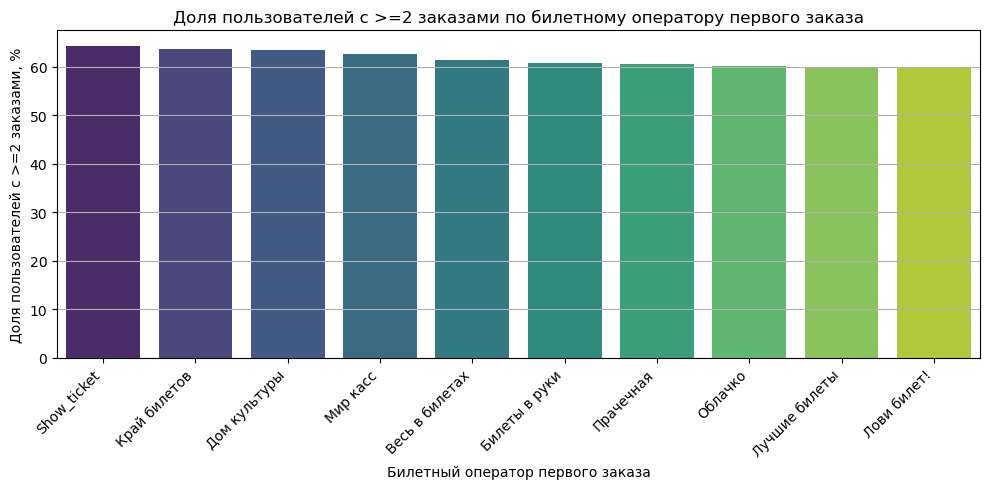

In [86]:
# График №1
# Строим barplot
plt.figure(figsize=(10, 5))
sns.barplot(
    x='first_partner',
    y='share%',
    hue='first_partner',
    data=partner_stats_o,
    palette='viridis',
    dodge=False,
    legend=False,
    order=partner_stats_o['first_partner'],     # порядок категорий на оси X
    hue_order=partner_stats_o['first_partner']  # порядок цветов для hue
)

plt.xlabel('Билетный оператор первого заказа')
plt.ylabel('Доля пользователей с >=2 заказами, %')
plt.xticks(rotation=45, ha='right')
plt.title('Доля пользователей с >=2 заказами по билетному оператору первого заказа')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

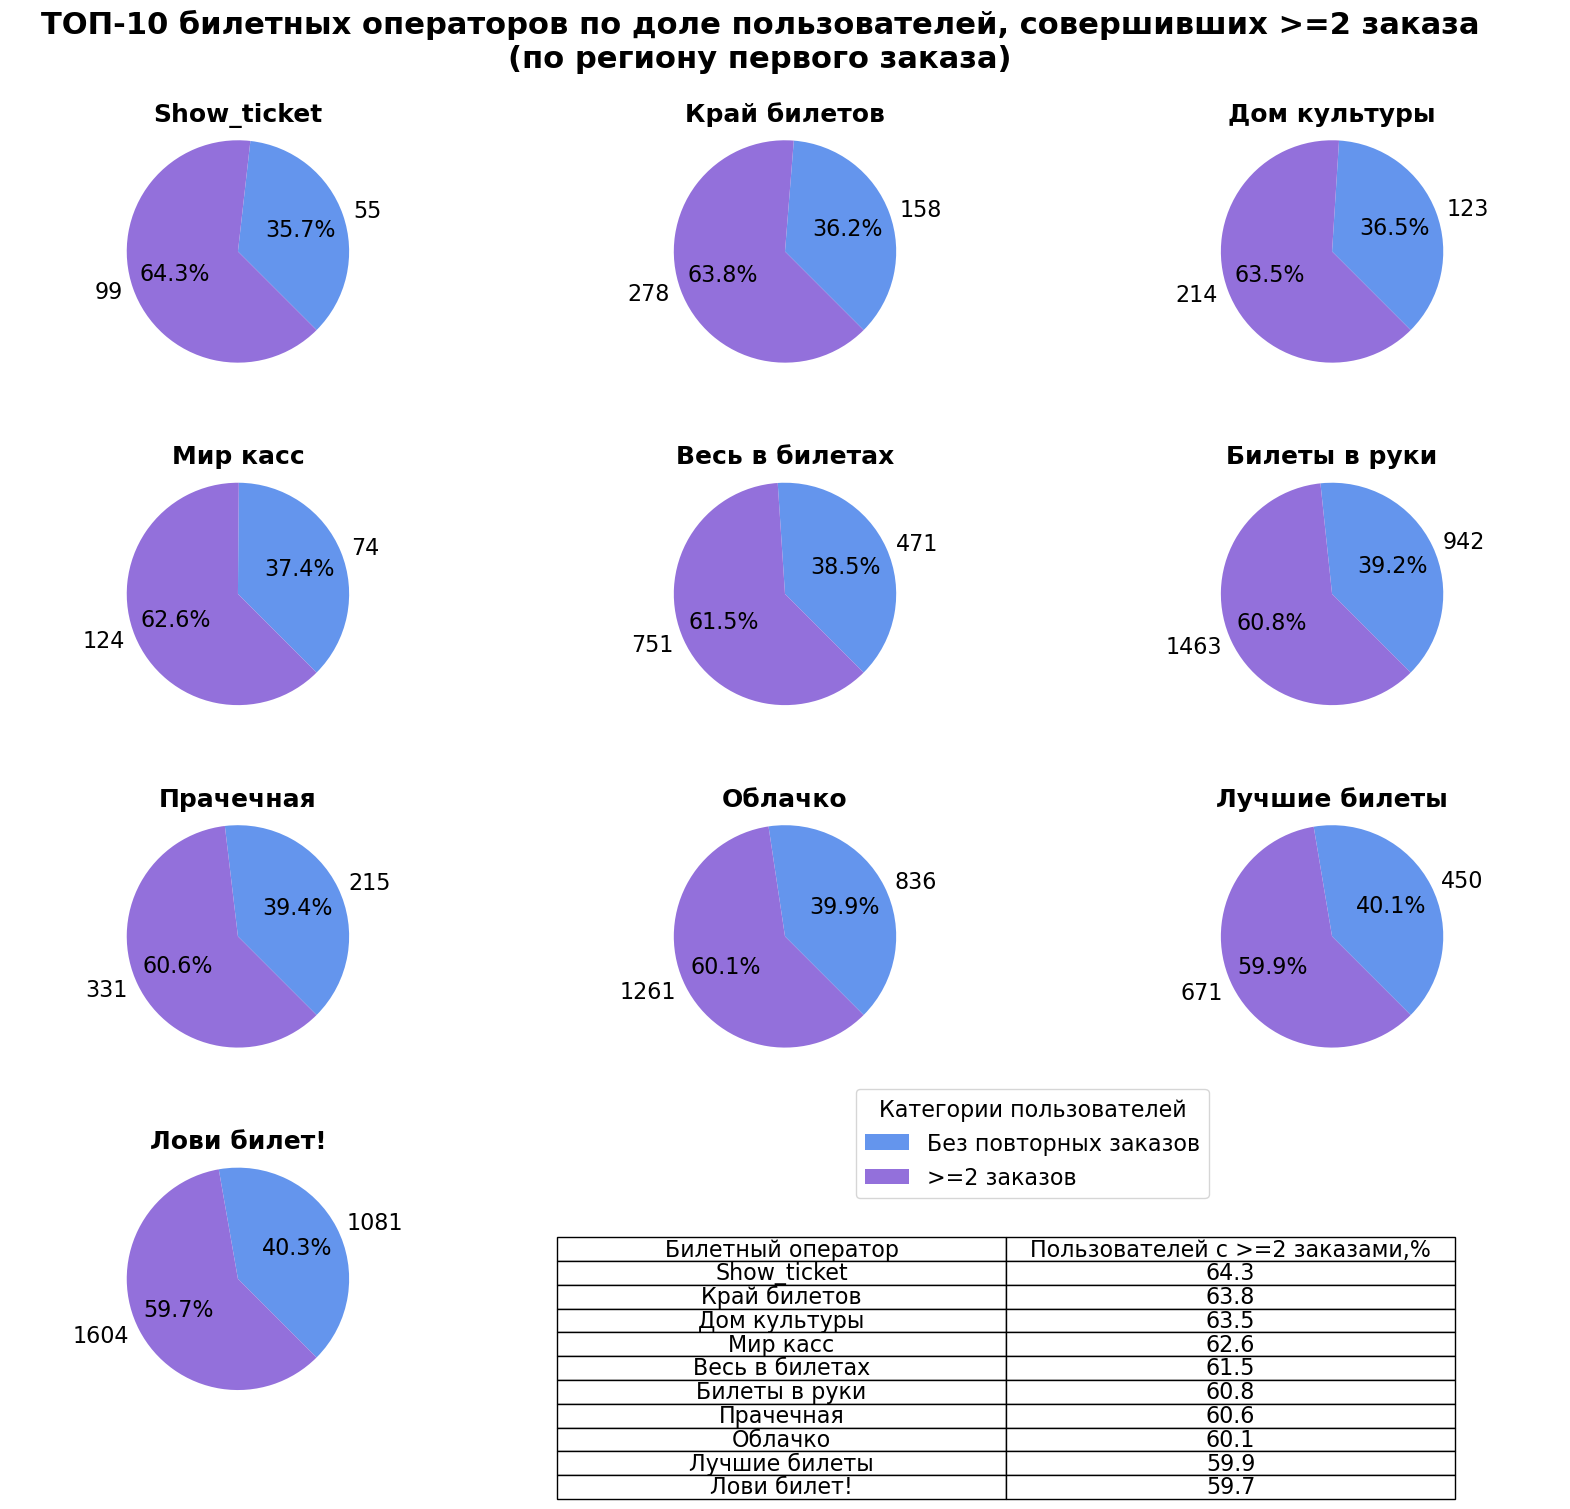

In [87]:
# # График №2
# Изучаем распределение пользователей c 1 и пользователей с >=2 заказами по билетному оператору, у которого совершена первая покупка
# Оставляем в исходном профиле только ТОП-10 билетных операторов по доле возвращающихся покупателей с их общим количеством от 100 и более
fp_top = fp[fp['first_partner'].isin(top_partners)]

unique_categories = top_partners
n_cats = len(unique_categories)

# Настраиваем сетку подграфиков
rows = int(np.ceil(n_cats / 3))
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
axes = axes.flatten()

# Создаем таблицу для подсчёта процента пользователей с >=2 заказами
network_share = []

# Устанавливаем цвета и подписи для категорий
colors = ['#6495ED', '#9370DB']
labels_map = {0: 'Без повторных заказов', 1: '>=2 заказов'}

for i, cat in enumerate(unique_categories):
    ax = axes[i]
    
    df2 = fp_top[fp_top['first_partner'] == cat]
    df2_counts = df2['is_two'].value_counts().sort_index()

# Проверяем, что присутствуют оба значения (0 и 1)
    df2_counts = df2_counts.reindex([0, 1], fill_value=0)

# Строим круговые диаграммы
    ax.pie(
        df2_counts,
        labels=df2_counts,
        autopct='%1.1f%%',
        startangle=-45,
        textprops={'fontsize': 16},
        colors=colors
    )
    
    ax.set_title(cat, fontsize=18, fontweight='bold')
    ax.axis('equal')

# Сохраняем данные для таблицы
    total = df2_counts.sum()
    percent = df2_counts[1] / total * 100 if total > 0 else 0
    network_share.append({
        'Билетный оператор': cat,
        'Пользователей с >=2 заказами,%': round(percent, 1)
    })

# Удаляем лишние пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Создаем легенду
fig.legend(
    labels_map.values(),
    title='Категории пользователей',
    loc='lower right',
    bbox_to_anchor=(0.73, 0.43),
    fontsize=16,
    title_fontsize=16
)

# Создаём данные для таблицы под графиками
df_network = (
    pd.DataFrame(network_share)
    .sort_values(by='Пользователей с >=2 заказами,%', ascending=False)
)

# Добавляем таблицу
plt.subplots_adjust(bottom=0.35, hspace=0.4)

table = plt.table(
    cellText=df_network.values,
    colLabels=df_network.columns,
    cellLoc='center',
    loc='bottom',
    bbox=[1.2, -0.4, 1.97, 1.07]   # высота таблицы
)

table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1, 1.8)    # размер ячеек

# Создаем заголовок
fig.suptitle(
    'ТОП-10 билетных операторов по доле пользователей, совершивших >=2 заказа\n(по региону первого заказа)',
    fontsize=22,
    fontweight='bold',
    y=0.93
)

plt.show()

***Чтобы избежать искажения статистики исключаем сегменты с менее чем 100 пользователями.***

**Выраженные "точки входа" (по билетным операторам) по ***доле*** пользователей, повторно заказывающих билеты ***от числа пользователей, впервые купивших билеты у данного оператора*** отсутствуют** - разница между минимумом и максимумом в ТОП-10 - 4,6%
  
**Чаще повторный заказ делают пользователи, которые впервые приобретали билеты у билетного оператора**
- Show_ticket - 154 пользователя итого / 64,3% покупателей, сделавшие первый заказ из этого региона, делают повторный заказ на платформе.

**Более крупные операторы (более 1тыс. покупателей)** из ТОП-10 билетных операторов первого заказа с высоким % возврата пользователей на платформу:
- Весь в билетах - 1222 покупателя / 61,5% возвратов пользователей на платформу,
- Билеты в руки - 2408 / 60,8%,
- Облачко - 2097 / 60,1%,
- Лучшие билеты - 1121 / 59,9%,
- Лови билет! - 59,7%.

**ВЫВОД**

**Выраженные "точки входа" по доле пользователей, повторно заказывающих билеты от общего числа пользователей по:**
- типам мероприятий,
- устройствам,
- регионам,
- билетным операторам\
первого заказа\
**отсутствуют.**
  
При вычислении статистики по регионам и билетным операторам из расчета были исключены попавшие в ТОП-10 малочисленные сегменты (до 100 пользователей) в виду их высокой чувствительности к колебаниям количества пользователей и, следовательно, нерепрезентативности.

#### Задача 4.1.3. Проверка продуктовых гипотез

***Посмотрим корреляцию доли пользователей, делающих повторный заказ на платформе (поле is_two) со следующими признаками: first_genre, first_device, first_region, first_partner через phik.***\
При расчете корреляции с first_region, first_partner из расчета исключаем сегменты с количеством данных менее 100 строк по данному сегменту.

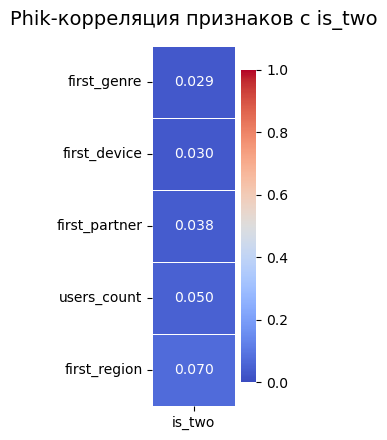

In [88]:
# Отфильтровываем редкие регионы ( <100 пользователей )
region_stats = (
    fp.groupby('first_region', observed=True)
      .agg(
           repeat_share=('is_two', 'mean'),
           users_count=('first_region', 'count')
      )
      .reset_index()
)

valid_regions = region_stats[region_stats['users_count'] >= 100]['first_region'].tolist()

# Отфильтровываем редких партнёров ( <100 пользователей )
partner_stats = (
    fp.groupby('first_partner', observed=True)
      .agg(
           repeat_share=('is_two', 'mean'),
           users_count=('first_partner', 'count')
      )
      .reset_index()
)

valid_partners = partner_stats[partner_stats['users_count'] >= 100]['first_partner'].tolist()

# Делаем копию исходного профиля и фильтруем его
corr_df = fp.copy()

corr_df = corr_df[
    corr_df['first_region'].isin(valid_regions) &
    corr_df['first_partner'].isin(valid_partners)
].copy()

# Добавляем users_count (размер региона) в corr_df
corr_df = corr_df.merge(
    region_stats[['first_region', 'users_count']],
    how='left',
    on='first_region'
)

# Выбираем признаки для корреляции
corr_cols = [
    'first_genre', 
    'first_device',  
    'first_partner',
    'users_count', # признак активности пользователей по регионам
    'first_region'
]

# Строим phik-матрицу: is_two - остальные категориальные признаки

phik_matrix = corr_df[['is_two'] + corr_cols].phik_matrix(
    interval_cols=['users_count']
)

# Оставляем только колонку is_two
phik_column = phik_matrix[['is_two']].loc[corr_cols]

# Настраиваем визуализацию

plt.figure(figsize=(2.5, 4.5))
sns.heatmap(phik_column, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f', vmin=0, vmax=1)
plt.title('Phik-корреляция признаков с is_two', fontsize=14, pad=15)
plt.tight_layout()
plt.show()


Получившаяся матрица корреляции подтверждает наши предыдущие выводы и расчеты - **возвращение пользователей на платформу не зависит от типа первого мероприятия, устройства, билетного оператора**, чуть выше (относительно связи остальных признаков), но все равно **отсутствует** в абсолютном значении **связь** возвращения пользователей на платформу **с регионом первого заказа - 0.07**, что может быть результатом разной широты ассортимента мероприятий и уровня финансовых возможностей пользователей в разных регионах.\
**Связь возвращения на платформу с количеством пользователей, посещающих мероприятия в регионе первого заказа (user_count) также практически отсутствующая - 0.05**.

***Опираясь на выводы из задач выше, проверим продуктовые гипотезы:***

**Гипотеза 1. Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.**\
**Не подтверждается.**\
Корреляция типа мероприятия с возвратом пользователей на платформу практически отсутствует (0.029),\
и пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ реже - в 54,3%,\
чем пользователи, оформившие свой первый заказ на концерты - в 60,4%.

**Гипотеза 2. В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.**\
**Не подтверждается.**\
Несмотря на то, что часть регионов (пять) одновременно попала в ТОП-10 по числу пользователей и по доле повторных заказов, статистическая связь между размером региона и вероятностью повторного заказа отсутствует (phik = 0.05).\
Пересечения в верхних позициях ранжирования объясняются эффектом больших чисел и низкой дисперсией показателей крупных регионов, а не реальной зависимостью.

### Анализ поведения пользователей через показатели выручки и состава заказа

#### Задача 4.2.1. Анализ связи между средней выручкой сервиса с заказа и повторными заказами

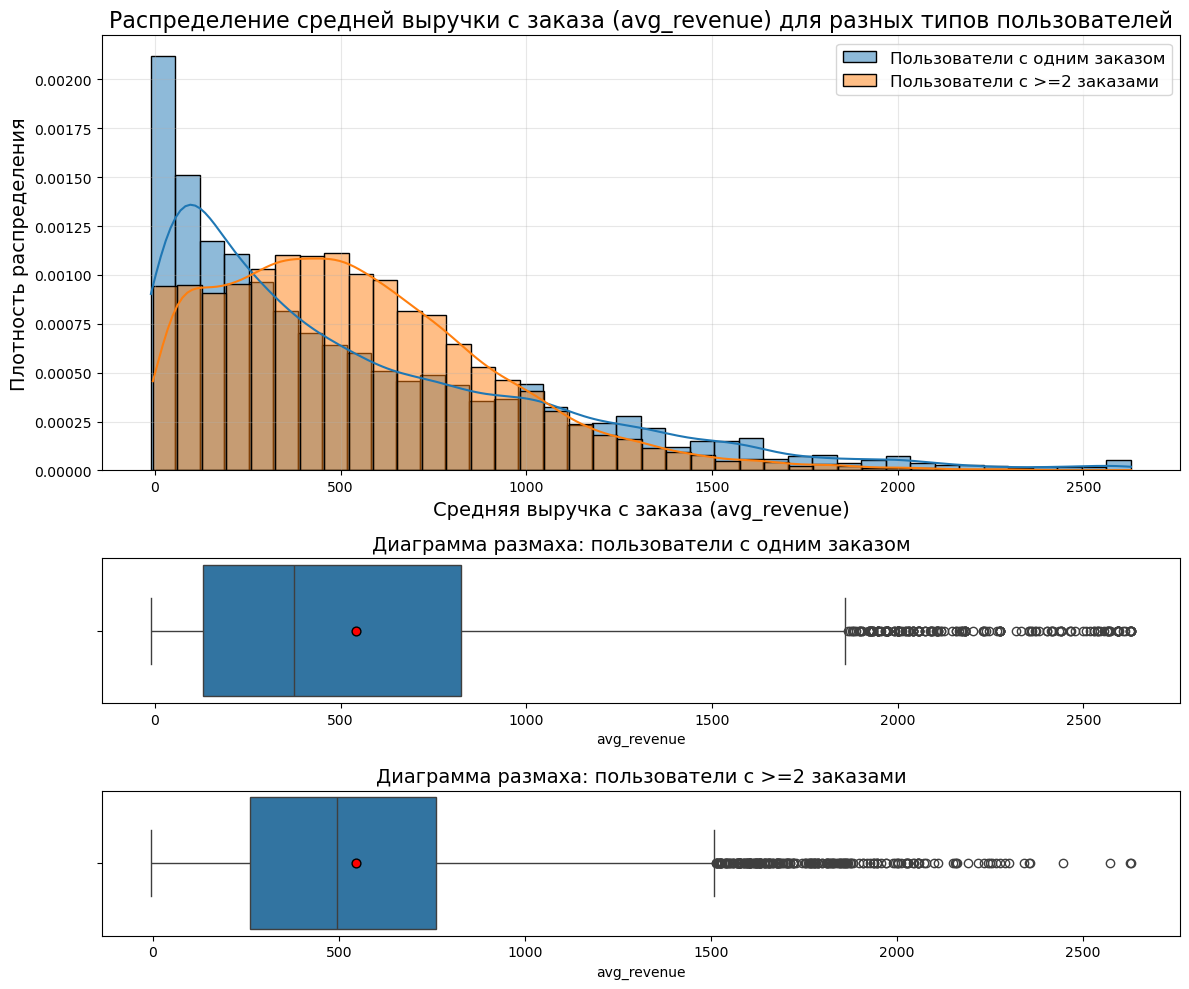

In [89]:
# Формируем две группы пользователей по количеству заказов
one_time = fp[fp['is_two'] == 0]['avg_revenue']
repeat = fp[fp['is_two'] == 1]['avg_revenue']

fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(12, 10),
    gridspec_kw={'height_ratios': [3, 1, 1]}
)

# Гистограммы
bins = 40

sns.histplot(
    one_time,
    bins=bins,
    edgecolor='black',
    alpha=0.5,
    kde=True,
    stat="density",
    label="Пользователи с одним заказом",
    ax=axes[0]
)

sns.histplot(
    repeat,
    bins=bins,
    edgecolor='black',
    alpha=0.5,
    kde=True,
    stat="density",
    label="Пользователи с >=2 заказами",
    ax=axes[0]
)

axes[0].set_title(
    "Распределение средней выручки с заказа (avg_revenue) для разных типов пользователей",
    fontsize=16
)
axes[0].set_xlabel("Средняя выручка с заказа (avg_revenue)", fontsize=14)
axes[0].set_ylabel("Плотность распределения", fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Boxplot — один заказ
sns.boxplot(x=one_time, ax=axes[1])
axes[1].scatter(
    one_time.mean(), 0,
    color='red', edgecolor='black', s=40, zorder=5
)
axes[1].set_title(
    "Диаграмма размаха: пользователи с одним заказом",
    fontsize=14
)

# Boxplot — повторные заказы
sns.boxplot(x=repeat, ax=axes[2])
axes[2].scatter(
    repeat.mean(), 0,
    color='red', edgecolor='black', s=40, zorder=5
)
axes[2].set_title(
    "Диаграмма размаха: пользователи с >=2 заказами",
    fontsize=14
)

plt.tight_layout()
plt.show()

In [90]:
one_time.describe()

count    8237.000000
mean      541.800621
std       516.599612
min       -10.770000
25%       130.000000
50%       374.160000
75%       823.930000
max      2628.421739
Name: avg_revenue, dtype: float64

In [91]:
# Применим функцию для расчета границ выбросов
limits(one_time)

Значения ниже -910.9 или выше 1864.82 являются выбросами


**Оценка распределения средней выручки с заказа для пользователей, совершивших один заказ:**
Распределение имеет положительную ассиметрию.
Значения среднего арифметического (541,8) и медианы (374,16) далеки (разница в 167,64).
Около 50% данных находятся в диапазоне от 130 до 823,93.
Основной разброс данных находится в интервале от -10,77 до 1864,82, значения от 1864,82 до 2628,42 являются выбросами.
Самая высокая плотность наблюдается в интервале от -10,77 до приблизительно 300.

In [92]:
repeat.describe()

count    12330.000000
mean       545.905349
std        376.038296
min         -5.385000
25%        260.708214
50%        493.885833
75%        760.776944
max       2628.421739
Name: avg_revenue, dtype: float64

In [93]:
# Применим функцию для расчета границ выбросов
limits(repeat)

Значения ниже -489.39 или выше 1510.88 являются выбросами


**Оценка распределения средней выручки с заказа для пользователей, совершивших 2 и более заказов:**\
Распределение имеет положительную ассиметрию.\
Значения среднего арифметического (545,91) и медианы (493,89) менее далеки (разница в 52,02).\
Около 50% данных находятся в диапазоне от 260,71 до 760,78.\
Основной разброс данных находится в интервале от -5,38 до 1510.88, значения от 1510.88 до 2628,42 являются выбросами.\
Самая высокая плотность наблюдается в интервале от около 300 приблизительно до 700.

**ВЫВОД**

**Пользователи с одним заказом**\
Основная концентрация значений наблюдается примерно в диапазоне от –10,77 до 300.\
Центральные 50% значений расположены в диапазоне от 130 до 823,93.\
Большая часть распределения простирается от –10,77 до 1864,82, выше — выбросы.

Наибольшая плотность и характерные значения средней выручки в диапазоне приблизительно от 0 до 300.

**Пользователи с двумя и более заказами**\
Основная концентрация значений наблюдается примерно в диапазоне от 300 до 700.\
Центральные 50% распределения расположены в диапазоне от 260,71 до 760,78.\
Большая часть распределения простирается от –5,38 до 1510,88, выше — выбросы.

Наибольшая плотность и характерные значения средней выручки в диапазоне приблизительно от 300 до 700.

**Различия между группами:**

**1. Разные интервалы наибольшей плотности распределений:**
- в диапазоне приблизительно 0–300 у пользователей с 1 заказом,
- в диапазоне приблизительно 300–700 у пользователей с 2 и более заказами.

***Пользователи, делающие повторные покупки, в среднем приносят более высокую среднюю выручку с заказа.***

**2. Разные интервалы разбросов:**

- более широкий разброс, с более частым попаданием в низкие значения и большим положительным смещением у пользователей с 1 заказом,
- более компактный разброс с меньшим положительным смещением у пользователей с 2 и более заказами.

**3. Статистика положения:**

- среднее у обеих групп близко (около 542 / около 546), но у группы с 1 заказом выше влияние выбросов.
- медиана у группы  >=2 заказов существенно выше (около 494 против около 374), что подтверждает смещение распределения в сторону больших значений.

#### Задача 4.2.2. Сравнение распределения средней выручки с заказа у пользователей, совершивших 2–4 заказа / 5 и более заказов

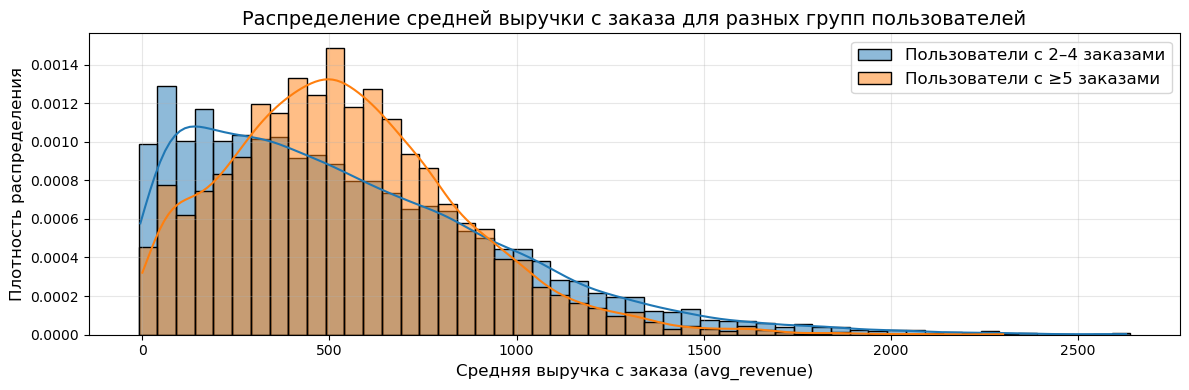

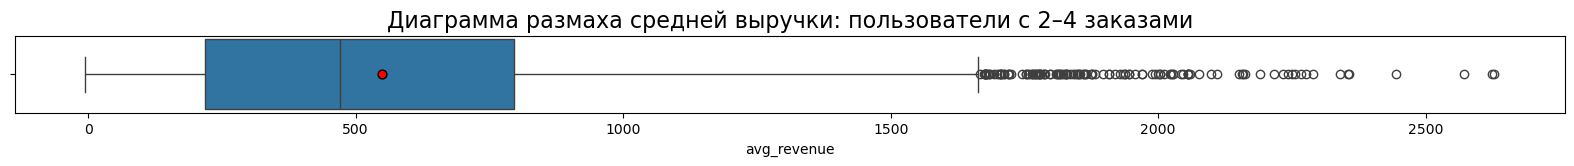

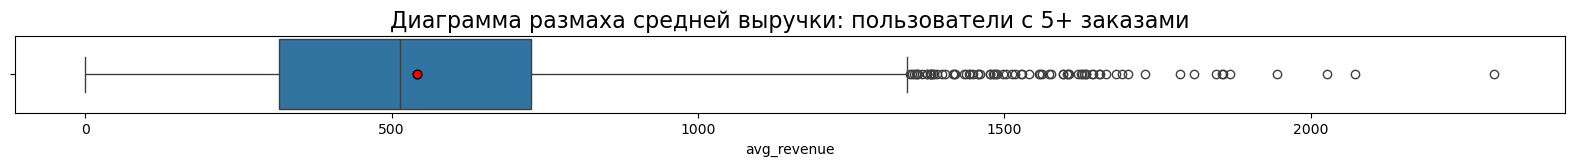

In [94]:
# Формируем две группы пользователей по количеству заказов
group_2_4 = fp[(fp["total_orders"] >= 2) & (fp["total_orders"] <= 4)]["avg_revenue"]
group_5 = fp[fp["total_orders"] >= 5]["avg_revenue"]

# Общие границы бинов по всей выборке
min_value = fp["avg_revenue"].min()
max_value = fp["avg_revenue"].max()

# Шаг бинов (50 рублей)
bins = range(int(min_value), int(max_value) + 50, 50)

# Визуализация — гистограмма с KDE
plt.figure(figsize=(12, 4))

sns.histplot(
    group_2_4,
    bins=bins,
    edgecolor='black',
    alpha=0.5,
    kde=True,
    stat="density",
    label="Пользователи с 2–4 заказами"
)

sns.histplot(
    group_5,
    bins=bins,
    edgecolor='black',
    alpha=0.5,
    kde=True,
    stat="density",
    label="Пользователи с ≥5 заказами"
)

plt.title(
    "Распределение средней выручки с заказа для разных групп пользователей",
    fontsize=14
)
plt.xlabel("Средняя выручка с заказа (avg_revenue)", fontsize=12)
plt.ylabel("Плотность распределения", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Диаграмма размаха: 2–4 заказа
plt.figure(figsize=(20, 1))
sns.boxplot(x=group_2_4)
plt.scatter(group_2_4.mean(), 0, color='red', edgecolor='black', s=40, zorder=5)
plt.title(
    "Диаграмма размаха средней выручки: пользователи с 2–4 заказами",
    fontsize=16
)
plt.show()

# Диаграмма размаха: 5+ заказов
plt.figure(figsize=(20, 1))
sns.boxplot(x=group_5)
plt.scatter(group_5.mean(), 0, color='red', edgecolor='black', s=40, zorder=5)
plt.title(
    "Диаграмма размаха средней выручки: пользователи с 5+ заказами",
    fontsize=16
)
plt.show()

In [95]:
group_2_4.describe()

count    7094.000000
mean      549.258367
std       416.850030
min        -5.385000
25%       218.033750
50%       470.616250
75%       796.768958
max      2628.421739
Name: avg_revenue, dtype: float64

In [96]:
# Применим функцию для расчета границ выбросов
limits(group_2_4)

Значения ниже -650.07 или выше 1664.87 являются выбросами


**Оценка распределения средней выручки с заказа для пользователей, совершивших 2–4 заказа:**\
Распределение имеет положительную ассиметрию.\
Значения среднего арифметического (549.26) и медианы (470.62) относительно далеки (разница в 78,64).\
Около 50% данных находятся в диапазоне от 218,03 до 796.77.\
Основной разброс данных находится в интервале от -5.38 до 1664.88, значения от 1664.88 до 2628.42 являются выбросами.\
Самая высокая плотность наблюдается в интервале приблизительно от -5.38 до 510.

In [97]:
group_5.describe()

count    5236.000000
mean      541.362510
std       312.333022
min         0.000000
25%       316.518750
50%       514.385250
75%       728.085250
max      2299.869022
Name: avg_revenue, dtype: float64

In [98]:
# Применим функцию для расчета границ выбросов
limits(group_5)

Значения ниже -300.83 или выше 1345.43 являются выбросами


**Оценка распределения средней выручки с заказа для пользователей, совершивших 5 и более заказов:**\
Распределение имеет положительную ассиметрию.\
Значения среднего арифметического (541.36) и медианы (514.39) относительно близки (разница в 26,97).\
Около 50% данных находятся в диапазоне от 316.52 до 728.08.\
Основной разброс данных находится в интервале от 0 до 1345.43, значения от 1345.43 до 2299.87 являются выбросами.\
Самая высокая плотность наблюдается в интервале приблизительно от 300 до 700.

**ВЫВОД**

**Пользователи, совершившие 2–4 заказа**\
Основная концентрация значений наблюдается примерно в диапазоне от -5.38 до 510.\
Центральные 50% значений расположены в диапазоне от 218,03 до 796.77.\
Большая часть распределения простирается от -5.38 до 1664.88, выше — выбросы.

Наибольшая плотность и характерные значения средней выручки в диапазоне приблизительно от 0 до 510.

**Пользователи, совершившие 5 и более заказов:**\
Основная концентрация значений наблюдается примерно в диапазоне от 300 до 700.\
Центральные 50% распределения расположены в диапазоне от 316.52 до 728.08.\
Большая часть распределения простирается от от 0 до 1345.43, выше — выбросы.

Наибольшая плотность и характерные значения средней выручки в диапазоне приблизительно 300–700.

**Различия между группами:**

**1. Разные интервалы наибольшей плотности распределений:**
- в диапазоне приблизительно 0–510 у пользователей с 2–4 заказами,
- в диапазоне приблизительно 300–700 у пользователей с 5 и более заказами.

***Пользователи, делающие от 5-ти заказов, в среднем приносят более высокую среднюю выручку с заказа.***

**2. Разные интервалы разбросов:**

- более широкий разброс, с более частым попаданием в низкие значения и большим положительным смещением у пользователей с с 2–4 заказами,
- более компактный разброс с меньшим положительным смещением у пользователей с 5 и более заказами.

**3. Статистика положения:**

- среднее у обеих групп близко (около 549 / около 541), но у группы с 1 заказом выше влияние выбросов.
- медиана у группы  >=5 заказов выше (около 514 против около 470), что подтверждает смещение распределения в сторону больших значений.

#### Задача 4.2.3. Анализ влияния среднего количества билетов в заказе на вероятность повторной покупки

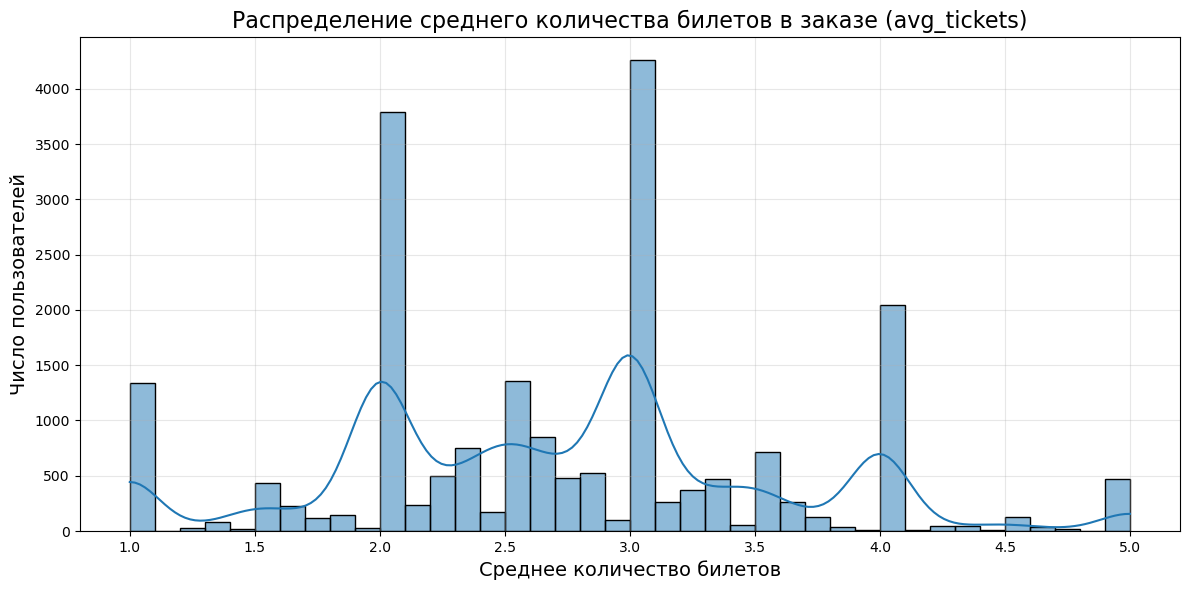

,users,repeat_users,repeat_share%
tickets_segment,,,
1–2 билета,2415,1237,51.22
2–3 билета,8759,6250,71.36
3–5 билетов,8926,4782,53.57
5+ билетов,467,61,13.06


In [99]:
# Визуализация - гистограмма распределения пользователей по среднему количеству билетов в заказе
plt.figure(figsize=(12, 6))

sns.histplot(
    fp["avg_tickets"],
    bins=40,
    kde=True,
    edgecolor='black'
)

plt.title("Распределение среднего количества билетов в заказе (avg_tickets)", fontsize=16)
plt.xlabel("Среднее количество билетов", fontsize=14)
plt.ylabel("Число пользователей", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Проведем сегментацию по среднему количеству билетов в заказе (avg_tickets)
bins = [0, 2, 3, 5, np.inf] 
labels = ["1–2 билета", "2–3 билета", "3–5 билетов", "5+ билетов"] 
fp1=fp.copy()
fp1["tickets_segment"] = pd.cut(fp1["avg_tickets"], 
                                bins=bins, 
                                labels=labels, 
                                right=False) 
# Агрегация 
segment_stats = ( 
    fp1.groupby("tickets_segment", observed=True) 
        .agg( users=("is_two", "count"), 
              repeat_users=("is_two", "sum") 
            ) 
) 

segment_stats["repeat_share%"] = round(segment_stats["repeat_users"] / segment_stats["users"]*100, 2) 
segment_stats


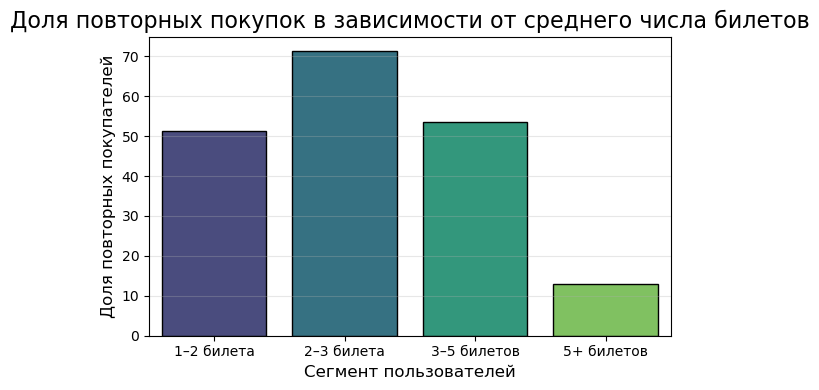

In [100]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=segment_stats.reset_index(),
    x="tickets_segment",
    y="repeat_share%",
    edgecolor="black",
    hue='tickets_segment',
    palette='viridis',
    legend=False,
    dodge=False
)

plt.title("Доля повторных покупок в зависимости от среднего числа билетов", fontsize=16)
plt.xlabel("Сегмент пользователей", fontsize=12)
plt.ylabel("Доля повторных покупателей", fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


**Распределение пользователей по сегментам:**

Пользователи сконцентрированы в сегментах 2–3 и 3–5 билетов — именно там находится основная масса аудитории.\
Сегмент 5+ билетов является малочисленным и статистически нестабильным.

**Сегменты с аномальной долей повторных покупок:**
- сегмент 2–3 билета — аномально высокая доля повторных заказов (71%),
- сегмент 5+ билетов — аномально низкая доля повторных заказов (13%).

**ВЫВОД:**
- небольшое количество билетов связано с регулярными приобретениями (вероятно пары, небольшие компании или семьи, предпочитающие такой вид досуга, что способствует повышению лояльности),
- очень большие заказы чаще носят разовый, событийный характер (групповые/корпоративные покупки, вследствие чего носящие непостоянный характер).

### Временные характеристики первого заказа и их влияние на повторные покупки

#### Задача 4.3.1. Анализ влияния дня недели, в который была совершена первая покупка на поведение пользователей

In [101]:
# Подготовка данных
# День недели первой покупки
fp2=fp.copy()
fp2["first_order_weekday"] = fp2["first_order_dt"].dt.day_name()

# Зададим правильный порядок дней недели
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

fp2["first_order_weekday"] = pd.Categorical(
    fp2["first_order_weekday"],
    categories=weekday_order,
    ordered=True
)

In [102]:
# Агрегация
weekday_stats = (
    fp2.groupby("first_order_weekday", observed=True)
    .agg(
        users=("is_two", "count"),
        repeat_users=("is_two", "sum")
    )
)

weekday_stats["repeat_share%"] = round(weekday_stats["repeat_users"] / weekday_stats["users"]* 100, 2)
weekday_stats

,users,repeat_users,repeat_share%
first_order_weekday,,,
Monday,2796,1726,61.73
Tuesday,2994,1802,60.19
Wednesday,2930,1794,61.23
Thursday,3001,1755,58.48
Friday,3140,1851,58.95
Saturday,3094,1876,60.63
Sunday,2612,1526,58.42


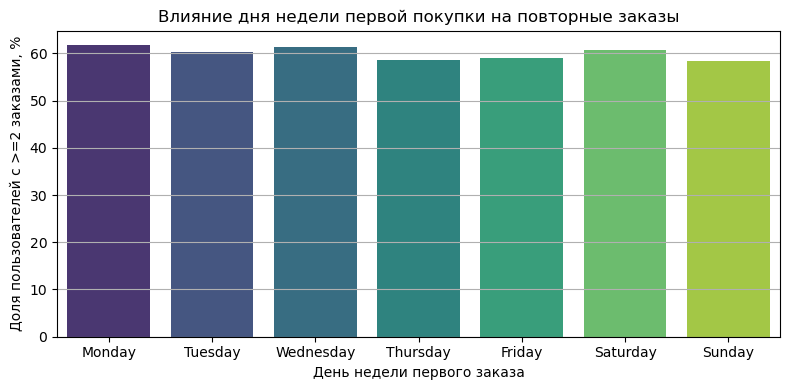

In [103]:
# Визуализация
plt.figure(figsize=(8, 4))

sns.barplot(
    x=weekday_stats.index,
    y="repeat_share%",
    data=weekday_stats.reset_index(),
    palette="viridis",
    legend=False,
    dodge=False,
    hue=weekday_stats.index
)

plt.xlabel("День недели первого заказа")
plt.ylabel("Доля пользователей с >=2 заказами, %")
plt.title("Влияние дня недели первой покупки на повторные заказы")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

**ВЫВОД:**

**Влияние на вероятность повторных заказов дня недели первой покупки - крайне слабое**.\
Существенных различий между днями недели не наблюдается, что позволяет считать данный фактор второстепенным для удержания пользователей.

#### Задача 4.3.2. Анализ влияния среднего интервала между заказами на удержание клиентов

In [104]:
# Вычисляем средний интервал между заказами по группам
interval_df = fp[
    (fp["total_orders"] >= 2)   # только пользователи с повторными заказами
].copy()

interval_df["order_group"] = np.where(
    interval_df["total_orders"] >= 5,
    "5+ заказов",
    "2–4 заказа"
)

interval_stats = (
    interval_df
    .groupby("order_group", observed=True)
    .agg(
        users=("avg_days_between", "count"),
        avg_days_between_mean=("avg_days_between", "mean"),
        avg_days_between_median=("avg_days_between", "median")
    )
    .round(2)
)
interval_stats


,users,avg_days_between_mean,avg_days_between_median
order_group,,,
2–4 заказа,7094,21.43,9.00
5+ заказов,5236,11.14,9.57


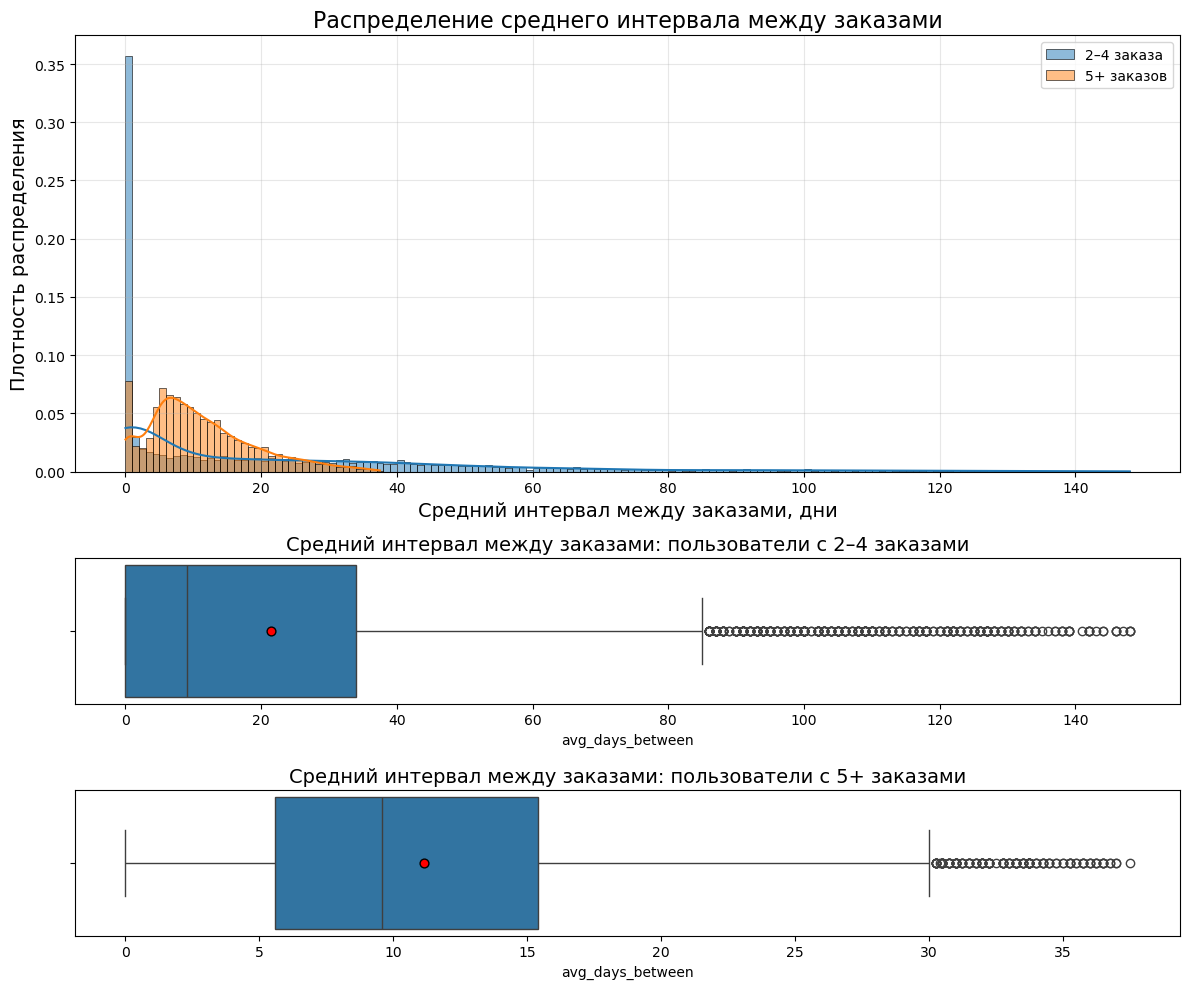

In [105]:
# Подготавливаем группы
group_2_4_1 = fp[(fp["total_orders"] >= 2) & (fp["total_orders"] <= 4)]["avg_days_between"]
group_5_1 = fp[fp["total_orders"] >= 5]["avg_days_between"]

# Общие границы бинов по всей выборке
min_value = fp["avg_days_between"].min()
max_value = fp["avg_days_between"].max()

# Шаг бинов (1 день)
bins = range(int(min_value), int(max_value) + 1, 1)

# Создаём область для трёх графиков
fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(12, 10),
    gridspec_kw={'height_ratios': [3, 1, 1]}
)

# Гистограмма
sns.histplot(
    group_2_4_1.dropna(),
    bins=bins,
    alpha=0.5,
    kde=True,
    stat="density",
    label="2–4 заказа",
    ax=axes[0]
)

sns.histplot(
    group_5_1.dropna(),
    bins=bins,
    alpha=0.5,
    kde=True,
    stat="density",
    label="5+ заказов",
    ax=axes[0]
)

axes[0].set_title(
    "Распределение среднего интервала между заказами",
    fontsize=16
)
axes[0].set_xlabel("Средний интервал между заказами, дни", fontsize=14)
axes[0].set_ylabel("Плотность распределения", fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot: 2–4 заказа
sns.boxplot(x=group_2_4_1, ax=axes[1])
axes[1].scatter(
    group_2_4_1.mean(),
    0,
    color='red',
    edgecolor='black',
    s=40,
    zorder=5
)
axes[1].set_title(
    "Средний интервал между заказами: пользователи с 2–4 заказами",
    fontsize=14
)

# Boxplot: 5+ заказов
sns.boxplot(x=group_5_1, ax=axes[2])
axes[2].scatter(
    group_5_1.mean(),
    0,
    color='red',
    edgecolor='black',
    s=40,
    zorder=5
)
axes[2].set_title(
    "Средний интервал между заказами: пользователи с 5+ заказами",
    fontsize=14
)

plt.tight_layout()
plt.show()

In [106]:
group_2_4_1.describe()

count    7094.000000
mean       21.434534
std        28.518215
min         0.000000
25%         0.000000
50%         9.000000
75%        34.000000
max       148.000000
Name: avg_days_between, dtype: float64

In [107]:
group_5_1.describe()

count    5236.000000
mean       11.139377
std         7.773107
min         0.000000
25%         5.600000
50%         9.571429
75%        15.400000
max        37.500000
Name: avg_days_between, dtype: float64

In [108]:
# Применим функцию для расчета границ выбросов
limits(group_2_4_1)

Значения ниже -51.0 или выше 85.0 являются выбросами


In [109]:
# Применим функцию для расчета границ выбросов
limits(group_5_1)

Значения ниже -9.1 или выше 30.1 являются выбросами


##### ***Оценка распределения средней выручки с заказа для пользователей, совершивших 2–4 заказа:***
Распределение имеет положительную ассиметрию.\
Высокий пик около 0–4 дня связан с заказами, сделанными в один день.\
Значения среднего арифметического (21.43) и медианы (9) относительно далеки (разница в 12,43).\
Около 50% данных находятся в диапазоне от 0 до 34.\
Основной разброс данных находится в интервале от 0 до 85, значения от 85 до 148 являются выбросами.\
Самая высокая плотность наблюдается в интервале приблизительно от 0 до 34.

**25% значений равны 0 (много очень коротких интервалов).\
Длинный «хвост» - до 148 дней.**

***Оценка распределения средней выручки с заказа для пользователей, совершивших 5 и более заказов:***\
Распределение имеет положительную ассиметрию.\
Значения среднего арифметического (11,14) и медианы (9,57) относительно близки (разница в 1,57).\
Около 50% данных находятся в диапазоне от 5,6 до 15,4.\
Основной разброс данных находится в интервале от 0 до 30,1, значения от 30,1 до 37,5 являются выбросами.\
Самая высокая плотность наблюдается в интервале приблизительно от 5 до 15.

**Более компактное распределение и гораздо меньшая дисперсия.**

**ВЫВОД:**\
Пользователи с меньшим средним интервалом между заказами чаще совершают повторные покупки.\
Группа пользователей с 5 и более заказами характеризуется более короткими и стабильными интервалами между заказами,\
тогда как у пользователей с 2–4 заказами большая вариативность интервалов и имеются длинные паузы между покупками.

**Сокращение интервала между заказами связано с ростом лояльности и увеличением вероятности дальнейших повторных покупок.**

### Корреляционный анализ количества покупок и признаков пользователя

In [110]:
# Отбираем признаки для корреляции
corr_cols = [
    "first_region",
    "first_genre",
    "first_partner",
    "first_device",
    "avg_revenue",
    "avg_tickets",
    "avg_days_between",
    "total_orders"
]

corr_df = fp[corr_cols].copy()

In [111]:
# Корреляция phi_k с total_orders (все пользователи)
interval_cols = [
    "avg_revenue",
    "avg_tickets",
    "avg_days_between",
    "total_orders"
]
phik_matrix = corr_df.phik_matrix(interval_cols=interval_cols)

# Оставляем только корреляцию с total_orders
phik_total_orders = phik_matrix[["total_orders"]].drop(index="total_orders")

print(phik_total_orders.round(3).to_string())

                  total_orders
first_region             0.005
first_genre              0.034
first_partner            0.037
first_device             0.050
avg_revenue              0.266
avg_tickets              0.490
avg_days_between         0.492


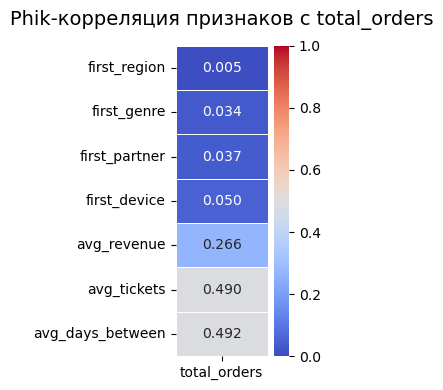

In [112]:
# Создаем визуализацию
plt.figure(figsize=(3, 4))
sns.heatmap(
    phik_total_orders,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".3f",
    vmin=0,
    vmax=1
)
plt.title("Phik-корреляция признаков с total_orders", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [113]:
# Оставляем только корреляцию с total_orders
# phik_total_orders = phik_matrix[["total_orders"]].drop(index="total_orders") - рассчитано выше
# строки — признаки, столбец — total_orders

phik_target = (
    phik_total_orders
    .rename(columns={"total_orders": "phi_k"})
    .sort_values("phi_k", ascending=True)
)

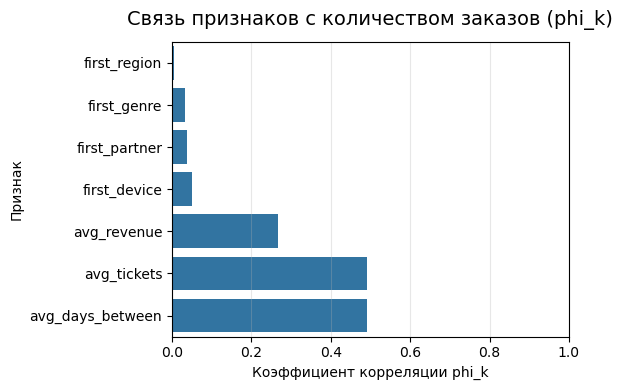

In [114]:
plt.figure(figsize=(6, 4))

sns.barplot(
    x="phi_k",
    y=phik_target.index,
    data=phik_target,
    orient="h"
)

plt.title(
    "Связь признаков с количеством заказов (phi_k)",
    fontsize=14,
    pad=12
)
plt.xlabel("Коэффициент корреляции phi_k")
plt.ylabel("Признак")

plt.xlim(0, 1)
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

***Корреляционный анализ с использованием коэффициента phi_k*** показал,\
что **наиболее выраженная связь с количеством заказов (total_orders) наблюдается у количественных признаков, отражающих поведение пользователей**:
- среднего интервала между заказами (avg_days_between),
- среднего количества билетов (avg_tickets),
- среднего дохода с заказа (avg_revenue).

**Категориальные характеристики первого заказа**: 
- first_region,
- first_genre,
- first_partner, first_device\
имеют с числом заказов **очень слабую связь**.

***Проверим разброс данных в total_orders***

In [115]:
# Проверка распределения total_orders
fp["total_orders"].value_counts(normalize=True).round(2).head(10)

total_orders
1     0.40
2     0.17
3     0.11
4     0.07
5     0.05
6     0.03
7     0.03
8     0.02
9     0.02
10    0.01
Name: proportion, dtype: float64

Т.к. в данных преобладает значение 1, то корреляционный анализ может ошибочно показать отсутствие связей.
Чтобы проверить корректность корреляционного анализа, выделим сегменты пользователей по полю total_orders, а затем повторим корреляционный анализ.

In [116]:
# Сегментация пользователей по total_orders
def segment_by_orders(df):
    df = df.copy()
    df["orders_segment"] = pd.cut(
        df["total_orders"],
        bins=[0, 1, 4, float("inf")],
        labels=["1 заказ", "2–4 заказа", "5+ заказов"],
        right=True
    )
    return df

In [117]:
# Phi_k внутри сегментов (без total_orders)
# Создаем функцию для расчёта и визуализации
def plot_phik_for_segment(df, segment_name, interval_cols):
    # Оставляем только пользователей сегмента
    segment_df = df[df["orders_segment"] == segment_name]

    # Убираем служебные колонки
    segment_df = segment_df.drop(columns=["orders_segment", "total_orders"])

    # Считаем phi_k
    phik_matrix = segment_df.phik_matrix(interval_cols=interval_cols)

    # Визуализация
    plt.figure(figsize=(6, 6))
    sns.heatmap(
        phik_matrix,
        annot=True,
        cmap="coolwarm",
        linewidths=0.5,
        fmt=".3f",
        vmin=0,
        vmax=1
    )
    plt.title(
        f"Phik-корреляция признаков\nСегмент: {segment_name}",
        fontsize=14,
        pad=15
    )
    plt.tight_layout()
    plt.show()

    print(phik_matrix.round(3).to_string())

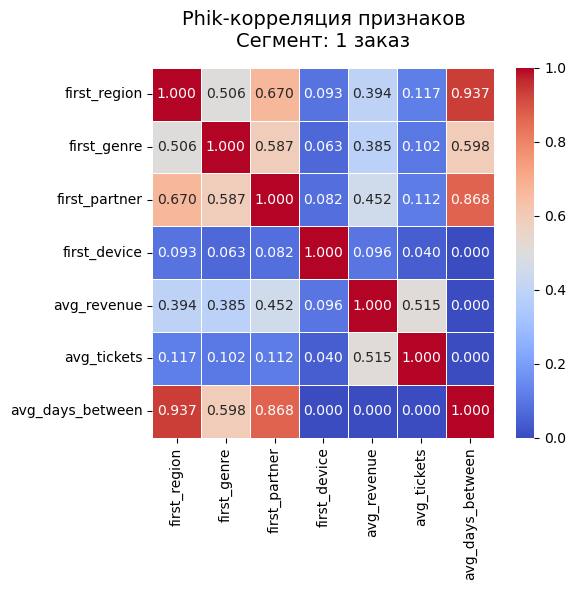

                  first_region  first_genre  first_partner  first_device  avg_revenue  avg_tickets  avg_days_between
first_region             1.000        0.506          0.670         0.093        0.394        0.117             0.937
first_genre              0.506        1.000          0.587         0.063        0.385        0.102             0.598
first_partner            0.670        0.587          1.000         0.082        0.452        0.112             0.868
first_device             0.093        0.063          0.082         1.000        0.096        0.040             0.000
avg_revenue              0.394        0.385          0.452         0.096        1.000        0.515             0.000
avg_tickets              0.117        0.102          0.112         0.040        0.515        1.000             0.000
avg_days_between         0.937        0.598          0.868         0.000        0.000        0.000             1.000


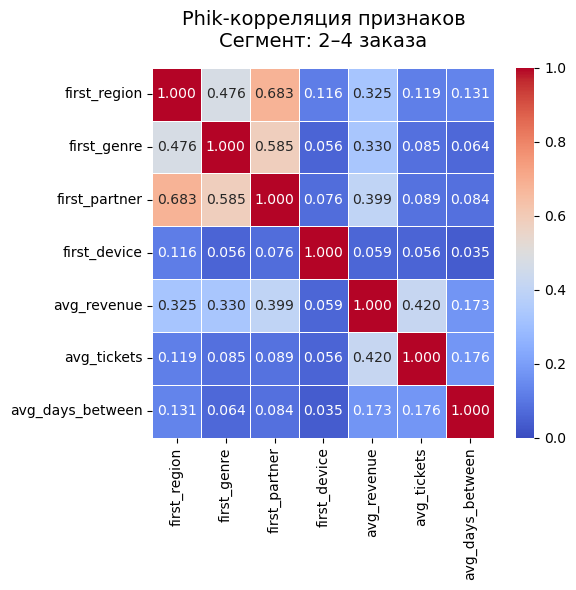

                  first_region  first_genre  first_partner  first_device  avg_revenue  avg_tickets  avg_days_between
first_region             1.000        0.476          0.683         0.116        0.325        0.119             0.131
first_genre              0.476        1.000          0.585         0.056        0.330        0.085             0.064
first_partner            0.683        0.585          1.000         0.076        0.399        0.089             0.084
first_device             0.116        0.056          0.076         1.000        0.059        0.056             0.035
avg_revenue              0.325        0.330          0.399         0.059        1.000        0.420             0.173
avg_tickets              0.119        0.085          0.089         0.056        0.420        1.000             0.176
avg_days_between         0.131        0.064          0.084         0.035        0.173        0.176             1.000


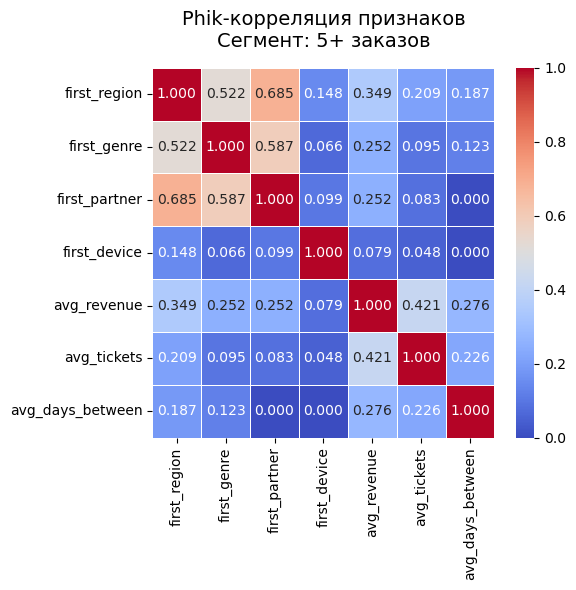

                  first_region  first_genre  first_partner  first_device  avg_revenue  avg_tickets  avg_days_between
first_region             1.000        0.522          0.685         0.148        0.349        0.209             0.187
first_genre              0.522        1.000          0.587         0.066        0.252        0.095             0.123
first_partner            0.685        0.587          1.000         0.099        0.252        0.083             0.000
first_device             0.148        0.066          0.099         1.000        0.079        0.048             0.000
avg_revenue              0.349        0.252          0.252         0.079        1.000        0.421             0.276
avg_tickets              0.209        0.095          0.083         0.048        0.421        1.000             0.226
avg_days_between         0.187        0.123          0.000         0.000        0.276        0.226             1.000


In [118]:
corr_cols = [
    "first_region",
    "first_genre",
    "first_partner",
    "first_device",
    "avg_revenue",
    "avg_tickets",
    "avg_days_between",
    "total_orders"
]

interval_cols = [
    "avg_revenue",
    "avg_tickets",
    "avg_days_between"
]

segmented_fp = segment_by_orders(fp)

for segment in ["1 заказ", "2–4 заказа", "5+ заказов"]:
    plot_phik_for_segment(
        segmented_fp[corr_cols + ["orders_segment"]],
        segment,
        interval_cols
    )

***Анализ по сегментам пользователей***

**Сегмент «1 заказ»**
В этом сегменте total_orders не варьируется, поэтому корреляция с числом заказов невозможна.\
Наблюдаются связи между самими признаками, в частности:
- взаимосвязь между категориальными признаками первого заказа, кроме first_device (взаимосвязи с этим признаком очень низкие);
- сильная связь ***avg_revenue и avg_tickets***.\
***Сегмент*** отражает характеристики первого заказа, но ***не позволяет проанализировать, что влияет на повторные покупки.***

**Сегмент «2–4 заказа»**\
Корреляции становятся более умеренными:
- ***avg_revenue и avg_tickets*** — phi_k около 0.42,
- ***avg_days_between*** имеет слабую–умеренную связь с количественными признаками;
- ***категориальные признаки*** по-прежнему слабо связаны с поведением.\
Для пользователей со средним числом заказов начинают проявляться зависимости, связанные с частотой и объёмом покупок.

**Сегмент «5+ заказов»**\
У наиболее лояльных пользователей наблюдаются наиболее устойчивые связи:
- ***avg_revenue и avg_tickets*** (phi_k около 0.42):
***avg_days_between*** имеет умеренную связь с:
- ***avg_revenue*** (phi_k около 0.28),
- ***avg_tickets*** (phi_k около 0.23);
***категориальные признаки первого заказа*** практически не влияют на количество заказов.
Для активных пользователей главноезначение имеет частота покупок и средний чек, а не параметры первого заказа.

**Промежуточный вывод:**\
Для проверки устойчивости результатов корреляционного анализа была проведена сегментация пользователей по числу заказов.\
Поскольку внутри сегментов значение total_orders фиксированное, расчёт корреляции с этим признаком невозможен. Вместо этого анализировалась структура взаимосвязей между признаками.\ 
Анализ корреляций внутри сегментов пользователей показал, что логика связей между признаками не сильно меняется при росте числа заказов.\
В сегменте пользователей с 5 и более заказами сохраняется и усиливается связь признаков поведения покупателей (avg_tickets, avg_revenue, avg_days_between),\
а связи признаков первого заказа не усиливаются.\
Это **подтверждает первоначальный, сделанный по выборке без сегментации вывод** о том, что **количество заказов зависит от\
признаков поведения покупателей,\
а не от характеристик первого заказа**\
(дисбаланс по total_orders не вызвал искажений).

______________________________________________________________________________________________________________

**Наиболее выраженная связь с количеством заказов (total_orders) наблюдается у количественных признаков поведения покупателей**:
- среднего интервала между заказами (avg_days_between),
- среднего количества билетов (avg_tickets),
- среднего дохода с заказа (avg_revenue).\
**Категориальные характеристики первого заказа (first_region, first_genre, first_partner, first_device) имеют крайне слабую связь с числом заказов.**

Дополнительный анализ по сегментам (1 заказ, 2–4 заказа, 5+ заказов) показал, что внутри сегментов существуют взаимосвязи между категориальными признаками первого заказа (кроме признака first_device), однако эти связи не усиливаются с ростом числа заказов по сегментам, т.е. отражают внутреннюю структуру сегментов, но не факторы, влияющие на рост количества заказов.\
Взаимосвязи между количественными признаками (avg_revenue и avg_tickets) сохраняются и растут с повышением числа заказов по сегментам.\
**Дополнительный анализ подтвердил корректность анализа по всей выборке**.

## Итоговый вывод и рекомендации

### Информация о данных и их обработке

В рамках проекта были проанализированы данные сервиса «Яндекс Афиша», содержащие ***290 611 записей о заказах*** пользователей.\
После агрегации заказов были сформированы ***профили 21 854 уникальных пользователей***, включающие характеристики первого заказа, характеристики поведения и активности пользователей.

**На этапе подготовки данных произведено:**
- проверка и подтверждение корректности типов данных (даты — datetime64, числовые показатели — int и float, категориальные признаки — category);
- анализ пропусков: пропуски выявлены только в поле days_since_prev, что является ожидаемым для первой покупки пользователя;
- очистка данных от выбросов:\
  удалены заказы с аномально высокой выручкой (выше 99-го перцентиля);\
  исключены пользователи с экстремально высоким ***числом заказов*** (выше ***95***-го перцентиля) и с аномально большим ***средним количеством билетов*** (выше ***99***-го перцентиля);
- в результате фильтрации ***было удалено около 6% наблюдений***, что позволило исключить корпоративных пользователей и ресейлеров и сделать анализ поведения клиентов более показательным.

### Основные результаты анализа

**Общая характеристика пользователей**

В выборке представлено 21 854 пользователя.\
Распределение по числу заказов неравномерное:
- 40% пользователей совершают только 1 заказ;
- 61,7% пользователей совершают 2 и более заказов;
- 29% пользователей совершают 5 и более заказов, формируя важный сегмент лояльной аудитории.

Число заказов по медиане — 2, при этом присутствует длинный «хвост» распределения.
После фильтрации ***в выборке осталось 20 567 пользователей**, на которых был проведён дальнейший анализ.
______________________________________________________________________________________________________________

**Признаки первого заказа и их связь с возвращением пользователя на платформу**

Анализ характеристик первого заказа (тип мероприятия, регион, устройство, билетный оператор) показал:
- ***присутствуют*** выраженные ***«точки входа»*** по числу пользователей (концерты, мобильные устройства, крупные регионы ТОП-3, популярные билетные операторы ТОП-7);
- выраженные ***«точки входа» по доле повторных заказов*** в категориях первого заказа ***отсутствуют***;
- обе ***продуктовые гипотезы***: о влиянии типа мероприятия и региона первого заказа на вероятность возврата - ***не подтвердились***.

***Параметры первого заказа*** влияют на входящий пользовательский поток, но ***не влияют на удержание клиентов***.
______________________________________________________________________________________________________________

**Связь средней выручки и повторных покупок**

Пользователи, совершающие повторные заказы, в среднем имеют более высокую выручку с заказа (по медиане).

Для ***пользователей с >=2 заказами*** характерны:
- более компактные распределения выручки;
- меньшая доля низких значений;
- смещение плотности распределения в сторону более высоких значений.

***Пользователи с >=5 заказами приносят наибольшую выручку по медиане, несмотря на схожие средние значения***.
______________________________________________________________________________________________________________

**Связь средней выручки и среднего количества билетов в заказе**

Основная масса пользователей сосредоточена в сегментах 2–3 и 3–5 билетов.

Сегменты с аномальной долей повторных покупок:
- ***2–3 билета*** — ***повышенная доля повторных заказов*** (71%);
- ***5+ билетов*** — ***низкая доля повторных заказов*** (13%).

***Небольшие заказы*** чаще связаны ***с регулярными покупками***, а ***крупные заказы*** носят ***разовый***, событийный ***характер.***
______________________________________________________________________________________________________________

**Влияния дня недели, в который была совершена первая покупка на поведение пользователей**

***День недели первой покупки практически не влияет на вероятность повторных заказов.***

Средний интервал между заказами является значимым фактором удержания:
- пользователи с 5+ заказами имеют короткие и стабильные интервалы;
- пользователи с 2–4 заказами демонстрируют большую вариативность и длинные паузы.\
***Сокращение интервала между покупками связано с ростом лояльности.***
______________________________________________________________________________________________________________

**Корреляционный анализ количества покупок**

Наиболее ***выраженная связь*** с числом заказов (total_orders) наблюдается у количественных признаков поведения пользователей:
- ***avg_days_between*** (среднее количество дней между заказами),
- ***avg_tickets*** (среднее количество билетов в заказе),
- ***avg_revenue*** (средняя выручка с заказа).

***Категориальные характеристики первого заказа имеют крайне слабую связь с числом заказов.***

***Дополнительный анализ по сегментам*** (1 заказ, 2–4 заказа, 5+ заказов) показал, что:
- внутри сегментов существуют устойчивые взаимосвязи между частью категориальных признаков первого заказа (регион, жанр, партнёр), однако эти связи не усиливаются с ростом числа заказов и отражают структуру сегментов, а не факторы роста активности;
- взаимосвязи между количественными признаками (выручка, количество билетов, интервалы между покупками) сохраняются и усиливаются у более лояльных пользователей.

Это ***подтверждает корректность выводов, полученных при анализе всей выборки***.

### Рекомендации для заказчика

**При планировании маркетинговой стратегии учитывать следующие моменты:**

Следует ***ориентироваться на характеристики шаблонов поведения покупателей***:
- использовать средний интервал между заказами и среднее количество билетов в заказе как основные индикаторы лояльности;
- выявлять пользователей с сокращающимися интервалами между заказами и предлагать им персональные предложения.

***Считать приоритетными сегмент пользователей с 2–4 заказами***, разрабатывать для данной группы программы удержания и мотивации,\
т.к. это наиболее перспективная, лояльная группа для роста в сегмент 5+ заказов.

Учитывать, что сегмент 5+ билетов требует аккуратного подхода, так как такие покупки чаще носят разовый характер.

***Не*** следует ***ориентироваться на характеристики первого заказа*** как основные критерии, т.к. признаки: регион, устройство, тип мероприятия и билетный оператор первого заказа не помогают корректно прогнозировать по ним повторные покупки.

**Повторные заказы на платформе в большей степени определяются шаблонами поведения пользователей, а не параметрами их первого взаимодействия с сервисом.**